# U.S. Consumer Electronics Retailer - Sales Analysis

## 1) Introduction

In this project, I conducted an exploratory data analysis by using a sales dataset from an American online retail company. This corporation is present in some of the most important cities in the U.S. and it mainly sells electronic produts and accessories, for example, mobile phones, laptops, batteries, among others. This study's goal is to analyze the company's performance in 2019, and to discover opportunities to boost its sales. In a real world situation, this information would be valuable to the firm's strategic decision-making process, because it would allow the directors to know if the corporation's KPIs (Key Performance Indicators) are reaching their predetermined targets.


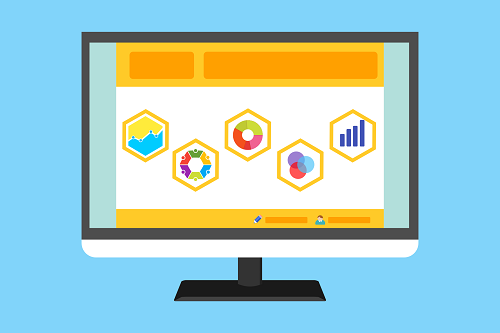

### 1.1) Data Source

This dataset is from Keith Galli's repository: https://github.com/KeithGalli/Pandas-Data-Science-Tasks. The dataset refers to the period from January 1st, 2019 to December 31, 2019. However, a few sales from January 1st, 2020 were incorrectly included in the dataset. Considering that I want to analyze the company's performance in 2019 only, I will exclude the data that corresponds to the first day of 2020 in the next steps of this notebook.

Taking this into account, this study is a combination from what I learned by studying Keith's Galli notebook and my own contributions, which include a few different exploratory approaches and my personal interpretations of the results. Also, I used Tableau to complement the analysis and added other questions to the project.

### 1.2) Questions

Question 1: What was the best month for sales? How much was earned that month? What was its representativeness in comparison to the total revenue in 2019?

Question 2: Which city had the highest revenue? What was the representativeness of each city in terms of revenue?

Question 3:  What time should we display advertisements to maximize likelihood of customers buying products? Please, conduct a specific analysis for each city.

Question 4: Which product sold the most in 2019? Which were the best-selling products in each city? Why do you think this happened?

Question 5: Which products are most often sold together? In how many pairs each item is in?

Question 6: Which products generate the highest revenues?


Ok! Now, Let's start the analysis!

## 2) Importing

### 2.1) Libraries

In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import glob

### 2.2) Locate the dataset

In [8]:
import os

os.chdir('C:\\Users\\mform\\Desktop\\Data Analysis\\US Retail company dataset\\dataset - pandas\\SalesAnalysis\\Sales_Data')

As some hidden files named '.DS Store' (previously deleted files) appear in this directory, we will create a function named listdir_nonhidden to select only currently available files.


In [6]:
cwd='C:\\Users\\mform\\Desktop\\Data Analysis\\US Retail company dataset\\dataset - pandas\\SalesAnalysis\\Sales_Data'

def listdir_nonhidden(path):
    
    for f in os.listdir(path):
        
        if not f.startswith('.DS'):
            
            yield f

In [10]:
files=[file for file in listdir_nonhidden(cwd)]

files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [11]:
len(files) # 12 months

12

### 2.3) Merge data into a single file

In [12]:
merged_file=pd.DataFrame()

for file in files:
    
    single_df=pd.read_csv(cwd+'/'+file)
    
    merged_file=pd.concat([merged_file,single_df])

Before creating a csv file, it is a good practice to verify if there is already a file with the same name, which help us to avoid overwriting important files.

In [13]:
def check_name(filename):
    
    file_check=glob.glob(filename)

    if not file_check:

        merged_file.to_csv(filename)
        print(f'File created: {filename}')

    else:

        print('WARNING! Please, choose another filename. There is already a file with the same name.')

In [14]:
check_name('dataset.csv')

File created: dataset.csv


In [4]:
dataset=pd.read_csv('dataset.csv', index_col=0)

#'index_col=0' means that we are going to use the first column of the dataframe...

# as an index


display(dataset) # 186,850 rows × 6 columns

Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, Dallas, TX 75001  
1                 NaN                                      NaN  
2      04/07/19 22:30        682 Chestnut St, Boston, MA 02215  
3      04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
4      04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
...               ...                                      ...  
11681  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001  
11682  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016  
11683  09/23/19 07:39     220 12th St, San Francisco, CA 94016  
11684  09/19/19 17:30   511 Forest St, San Francisco, CA 94016  
11685  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016  

[186850 rows x 6 columns]

## 3) Data Cleansing 

### 3.1) Search for NANs and drop them

Look for NaNs throughout the DataFrame

In [21]:
nan_dataset=dataset[dataset.isna().any(axis=1)]

nan_dataset 

Order ID Product Quantity Ordered Price Each Order Date Purchase Address
1          NaN     NaN              NaN        NaN        NaN              NaN
356        NaN     NaN              NaN        NaN        NaN              NaN
735        NaN     NaN              NaN        NaN        NaN              NaN
1433       NaN     NaN              NaN        NaN        NaN              NaN
1553       NaN     NaN              NaN        NaN        NaN              NaN
...        ...     ...              ...        ...        ...              ...
10012      NaN     NaN              NaN        NaN        NaN              NaN
10274      NaN     NaN              NaN        NaN        NaN              NaN
10878      NaN     NaN              NaN        NaN        NaN              NaN
11384      NaN     NaN              NaN        NaN        NaN              NaN
11662      NaN     NaN              NaN        NaN        NaN              NaN

[545 rows x 6 columns]

There are 545 rows with NaNs. Apparently, 'most of them' or 'all of them' are full rows of NaNs. Let's confirm this.

In [23]:
dataset.isna().any() # All columns have at least one NaN element

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [24]:
dataset.dropna(how='all', inplace=True)

In [26]:
dataset.isna().any() # Ok! No NaNs anymore

# This confirms that they were all full rows of NaNs, because we used...

# ... dropna with (how='all'). This means that only full rows of NANs were dropped

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [27]:
dataset[dataset.isna().any(axis=1)]

Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address]
Index: []

## 4) Augment data

### 4.1) Create  'Month' and 'Year' columns

In [30]:
dataset.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

In order to identify what was the best month for sales, we have to create a month column. In addition, we need a 'year' column, so we can exclude data from January 1st, 2020, as it was mentioned in section 1.1.

- Let's try to convert the order dates to datetime first

Important Note:
    
I tried to convert the 'Order Date' column to datetime with the following code:

- dataset['Order Date']=pd.to_datetime(dataset['Order Date'])

However, we received a 'ParseError' message:

ParserError: Unknown string format: Order Date
        
This means that we still have problematic data, which cannot be converted to datetime. Let's find out what is happening with a different approach.

In [31]:
dataset['Month']=dataset['Order Date'].str[:2]

dataset.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001    04  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215    04  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001    04

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   Month             186305 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB


#### Important Note:

I tried to convert the Month column's dtype to 'int' by using the following code: 


- all_data['Month']=all_data['Month'].astype('int32')


Nonetheless, I received a Value Error as an output: "ValueError: invalid literal for int() with base 10: 'Or'".


This means that we still have to clean up our data. Let's check for 'Or' in our dataset.

In [36]:
dataset_test=dataset[dataset['Month']=='Or']

dataset_test

Order ID  Product  Quantity Ordered  Price Each  Order Date  \
519    Order ID  Product  Quantity Ordered  Price Each  Order Date   
1149   Order ID  Product  Quantity Ordered  Price Each  Order Date   
1155   Order ID  Product  Quantity Ordered  Price Each  Order Date   
2878   Order ID  Product  Quantity Ordered  Price Each  Order Date   
2893   Order ID  Product  Quantity Ordered  Price Each  Order Date   
...         ...      ...               ...         ...         ...   
10000  Order ID  Product  Quantity Ordered  Price Each  Order Date   
10387  Order ID  Product  Quantity Ordered  Price Each  Order Date   
11399  Order ID  Product  Quantity Ordered  Price Each  Order Date   
11468  Order ID  Product  Quantity Ordered  Price Each  Order Date   
11574  Order ID  Product  Quantity Ordered  Price Each  Order Date   

       Purchase Address Month  
519    Purchase Address    Or  
1149   Purchase Address    Or  
1155   Purchase Address    Or  
2878   Purchase Address    Or  
2893   Purchase Address    Or  
...                 ...   ...  
10000  Purchase Address    Or  
10387  Purchase Address    Or  
11399  Purchase Address    Or  
11468  Purchase Address    Or  
11574  Purchase Address    Or  

[355 rows x 7 columns]

As we can notice, there are 355 rows with 'Or' as the month data. Apparently, these rows don't have any valuable information. Let's do some tests to confirm this hypothesis. If we confirm it, we can drop these rows completely.

In [50]:
print(f"Order ID: {len(dataset[dataset['Order ID'].str.contains('Order ID')])} problematic rows")

print(f"Product: {len(dataset[dataset['Product'].str.contains('Product')])} problematic rows")

print(f"Quantity Ordered: {len(dataset[dataset['Quantity Ordered'].str.contains('Quantity Ordered')])} problematic rows")

print(f"Price Each: {len(dataset[dataset['Price Each'].str.contains('Price Each')])} problematic rows")

print(f"Order Date: {len(dataset[dataset['Order Date'].str.contains('Order Date')])} problematic rows")

print(f"Purchase Address: {len(dataset[dataset['Purchase Address'].str.contains('Purchase Address')])} problematic rows")

Order ID: 355 problematic rows
Product: 355 problematic rows
Quantity Ordered: 355 problematic rows
Price Each: 355 problematic rows
Order Date: 355 problematic rows
Purchase Address: 355 problematic rows


Ok! Let's drop these 355 rows, because they only contain irrelevant data.

In [51]:
dataset=dataset[dataset['Month']!='Or']

dataset

Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
5       176561            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address Month  
0      04/19/19 08:46             917 1st St, Dallas, TX 75001    04  
2      04/07/19 22:30        682 Chestnut St, Boston, MA 02215    04  
3      04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04  
4      04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04  
5      04/30/19 09:27        333 8th St, Los Angeles, CA 90001    04  
...               ...                                      ...   ...  
11681  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001    09  
11682  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016    09  
11683  09/23/19 07:39     220 12th St, San Francisco, CA 94016    09  
11684  09/19/19 17:30   511 Forest St, San Francisco, CA 94016    09  
11685  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016    09  

[185950 rows x 7 columns]

In [56]:
# Now, we are probably going to be able to convert the month column's dtype to int32

dataset['Month']=dataset['Month'].astype('int32')

<ipython-input-56-df4eff01dbd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Month']=dataset['Month'].astype('int32')


#### Important Note

The 'SettingWithCopyWarning' that was shown above is not an error. It is just warning us that pandas is not sure if it is editing on a copy or a view of the original dataframe. It is important not to supperss the warning, because when it happens, we must check the result in order to confirm that the operation has really worked. Below, we used 'dataset.info()' to confirm that the 'month' column dtype was correctly updated to 'int32'. In some cases, we can use '.loc' to conduct this task and prevent the warning from happening, but it was not necessary in this context.

We got information on this topic through the following sources:

https://www.youtube.com/watch?v=4R4WsDJ-KVc

https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

https://tomaugspurger.github.io/modern-1-intro.html

In [58]:
dataset.info() # It worked!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [60]:
dataset.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4

Now, let's convert the 'Order Date' column to datetime format. This will help us to answer some of the questions of this project.

In [62]:
dataset['Order Date']=pd.to_datetime(dataset['Order Date'])

dataset.head()

<ipython-input-62-a0de1b7b128c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Order Date']=pd.to_datetime(dataset['Order Date'])


Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

           Order Date                      Purchase Address  Month  
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4  
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4  
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4

We can see that the process worked! The column's dtype is now 'datetime64[ns]'. So, we don't have to worry about the SettingWithCopyWarning.

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 10.6+ MB


In [64]:
dataset['Year']=dataset['Order Date'].dt.year

dataset.head() # The code worked properly, as we can see that a new column was created in the dataframe.

<ipython-input-64-2d3151f7f542>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Year']=dataset['Order Date'].dt.year


Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

           Order Date                      Purchase Address  Month  Year  
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4  2019  
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4  2019  
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  2019  
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  2019  
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4  2019

### 4.2) Exclude data from 2020

In [67]:
data_2020=dataset[dataset['Year']==2020]

data_2020.head()

Order ID                   Product Quantity Ordered Price Each  \
1563   297150  Lightning Charging Cable                1      14.95   
2265   297817                    iPhone                1        700   
2266   297817  Lightning Charging Cable                2      14.95   
2425   297969              Google Phone                1        600   
2806   298344          Wired Headphones                4      11.99   

              Order Date                      Purchase Address  Month  Year  
1563 2020-01-01 00:38:00       427 Wilson St, Dallas, TX 75001      1  2020  
2265 2020-01-01 00:22:00  519 13th St, New York City, NY 10001      1  2020  
2266 2020-01-01 00:22:00  519 13th St, New York City, NY 10001      1  2020  
2425 2020-01-01 00:54:00   542 2nd St, San Francisco, CA 94016      1  2020  
2806 2020-01-01 03:34:00   731 7th St, New York City, NY 10001      1  2020

In [68]:
data_2020.info() # So, 34 rows will be excluded 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 1563 to 24804
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          34 non-null     object        
 1   Product           34 non-null     object        
 2   Quantity Ordered  34 non-null     object        
 3   Price Each        34 non-null     object        
 4   Order Date        34 non-null     datetime64[ns]
 5   Purchase Address  34 non-null     object        
 6   Month             34 non-null     int32         
 7   Year              34 non-null     int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(5)
memory usage: 2.3+ KB


In [69]:
dataset=dataset[dataset['Year']!=2020]

dataset # Now, we have 185,916 rows (185,950 - 34 = 185,916)

Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
5       176561            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

               Order Date                         Purchase Address  Month  \
0     2019-04-19 08:46:00             917 1st St, Dallas, TX 75001      4   
2     2019-04-07 22:30:00        682 Chestnut St, Boston, MA 02215      4   
3     2019-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90001      4   
4     2019-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90001      4   
5     2019-04-30 09:27:00        333 8th St, Los Angeles, CA 90001      4   
...                   ...                                      ...    ...   
11681 2019-09-17 20:56:00   840 Highland St, Los Angeles, CA 90001      9   
11682 2019-09-01 16:00:00  216 Dogwood St, San Francisco, CA 94016      9   
11683 2019-09-23 07:39:00     220 12th St, San Francisco, CA 94016      9   
11684 2019-09-19 17:30:00   511 Forest St, San Francisco, CA 94016      9   
11685 2019-09-30 00:18:00   250 Meadow St, San Francisco, CA 94016      9   

       Year  
0      2019  
2      2019  
3      2019  
4      2019  
5      2019  
...     ...  
11681  2019  
11682  2019  
11683  2019  
11684  2019  
11685  2019  

[185916 rows x 8 columns]

### 4.3) Reset the DataFrame's index

It is possible to notice that after we cleaned up the data, the index was not equal to the number of rows. So, let's reset it.

In [73]:
dataset.reset_index(drop=True, inplace=True)

dataset #Now, the index is correct!

Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1        176559  Bose SoundSport Headphones                1      99.99   
2        176560                Google Phone                1        600   
3        176560            Wired Headphones                1      11.99   
4        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
185911   259353      AAA Batteries (4-pack)                3       2.99   
185912   259354                      iPhone                1        700   
185913   259355                      iPhone                1        700   
185914   259356      34in Ultrawide Monitor                1     379.99   
185915   259357        USB-C Charging Cable                1      11.95   

                Order Date                         Purchase Address  Month  \
0      2019-04-19 08:46:00             917 1st St, Dallas, TX 75001      4   
1      2019-04-07 22:30:00        682 Chestnut St, Boston, MA 02215      4   
2      2019-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90001      4   
3      2019-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90001      4   
4      2019-04-30 09:27:00        333 8th St, Los Angeles, CA 90001      4   
...                    ...                                      ...    ...   
185911 2019-09-17 20:56:00   840 Highland St, Los Angeles, CA 90001      9   
185912 2019-09-01 16:00:00  216 Dogwood St, San Francisco, CA 94016      9   
185913 2019-09-23 07:39:00     220 12th St, San Francisco, CA 94016      9   
185914 2019-09-19 17:30:00   511 Forest St, San Francisco, CA 94016      9   
185915 2019-09-30 00:18:00   250 Meadow St, San Francisco, CA 94016      9   

        Year  
0       2019  
1       2019  
2       2019  
3       2019  
4       2019  
...      ...  
185911  2019  
185912  2019  
185913  2019  
185914  2019  
185915  2019  

[185916 rows x 8 columns]

### 4.3) Create a Column for 'Sales'

Before creating a column for 'Sales', we need to convert the dtype of two other columns: Quantity Ordered (to integer) and Price Each (to float).

In [75]:
dataset['Quantity Ordered']=pd.to_numeric(dataset['Quantity Ordered'])

dataset['Price Each']=pd.to_numeric(dataset['Price Each'])

<ipython-input-75-6def1fb49c70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Quantity Ordered']=pd.to_numeric(dataset['Quantity Ordered'])
<ipython-input-75-6def1fb49c70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Price Each']=pd.to_numeric(dataset['Price Each'])


In [76]:
dataset.info() # It worked!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185916 entries, 0 to 185915
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185916 non-null  object        
 1   Product           185916 non-null  object        
 2   Quantity Ordered  185916 non-null  int64         
 3   Price Each        185916 non-null  float64       
 4   Order Date        185916 non-null  datetime64[ns]
 5   Purchase Address  185916 non-null  object        
 6   Month             185916 non-null  int32         
 7   Year              185916 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(3)
memory usage: 10.6+ MB


In [77]:
dataset['Sales']=dataset['Quantity Ordered']*dataset['Price Each']

dataset.head() #It worked!

<ipython-input-77-805c5548ee8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sales']=dataset['Quantity Ordered']*dataset['Price Each']


Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
1   176559  Bose SoundSport Headphones                 1       99.99   
2   176560                Google Phone                 1      600.00   
3   176560            Wired Headphones                 1       11.99   
4   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month  Year  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4  2019   
1 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4  2019   
2 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  2019   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  2019   
4 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4  2019   

    Sales  
0   23.90  
1   99.99  
2  600.00  
3   11.99  
4   11.99

Now, let's organize the columns in the correct order:

In [78]:
cols=['Order ID', 'Product','Quantity Ordered', 'Price Each', 'Sales', 'Order Date', 'Month','Year', 'Purchase Address']

dataset=dataset[cols]

dataset.head()

Order ID                     Product  Quantity Ordered  Price Each   Sales  \
0   176558        USB-C Charging Cable                 2       11.95   23.90   
1   176559  Bose SoundSport Headphones                 1       99.99   99.99   
2   176560                Google Phone                 1      600.00  600.00   
3   176560            Wired Headphones                 1       11.99   11.99   
4   176561            Wired Headphones                 1       11.99   11.99   

           Order Date  Month  Year                      Purchase Address  
0 2019-04-19 08:46:00      4  2019          917 1st St, Dallas, TX 75001  
1 2019-04-07 22:30:00      4  2019     682 Chestnut St, Boston, MA 02215  
2 2019-04-12 14:38:00      4  2019  669 Spruce St, Los Angeles, CA 90001  
3 2019-04-12 14:38:00      4  2019  669 Spruce St, Los Angeles, CA 90001  
4 2019-04-30 09:27:00      4  2019     333 8th St, Los Angeles, CA 90001

Now, we are ready to answer the first question.

## 5) Solutions

### 5.1) Question 1: What was the best month for sales? How much was earned that month? What was its representativeness in comparison to the total revenue in 2019?

In [80]:
best_month=dataset.groupby('Month')['Sales'].sum().round(2)

best_month

Month
1     1813586.44
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [81]:
best_month.idxmax() # Best month = December

12

In [82]:
best_month.max() # Revenue in December = US$ 4,613,443.34

4613443.34

Let's create a chart with matplotlib to visualize these results

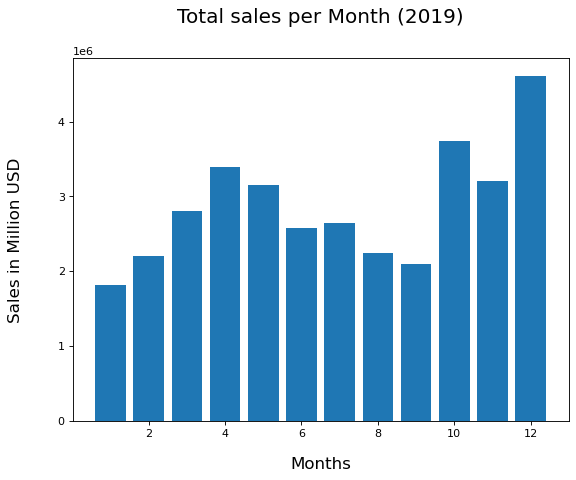

In [87]:
from matplotlib.pyplot import figure

months=range(1,13)

result=dataset.groupby('Month')['Sales'].sum()

figure(figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')

plt.bar(months, result)

plt.xlabel('Months', size=15)

ax=plt.gca()

ax.xaxis.set_label_coords(0.5,-0.1)

plt.ylabel('Sales in Million USD', size=15)

ay=plt.gca()

ay.yaxis.set_label_coords(-0.1,0.5)

plt.title('Total sales per Month (2019)', size=18, y=1.08)

plt.show()

I prefer to create charts with Tableau, because they are much more visual and customizable, allowing us to better interpret data. Please, consider that darker tons of blue indicate higher revenues:

### Chart 1)

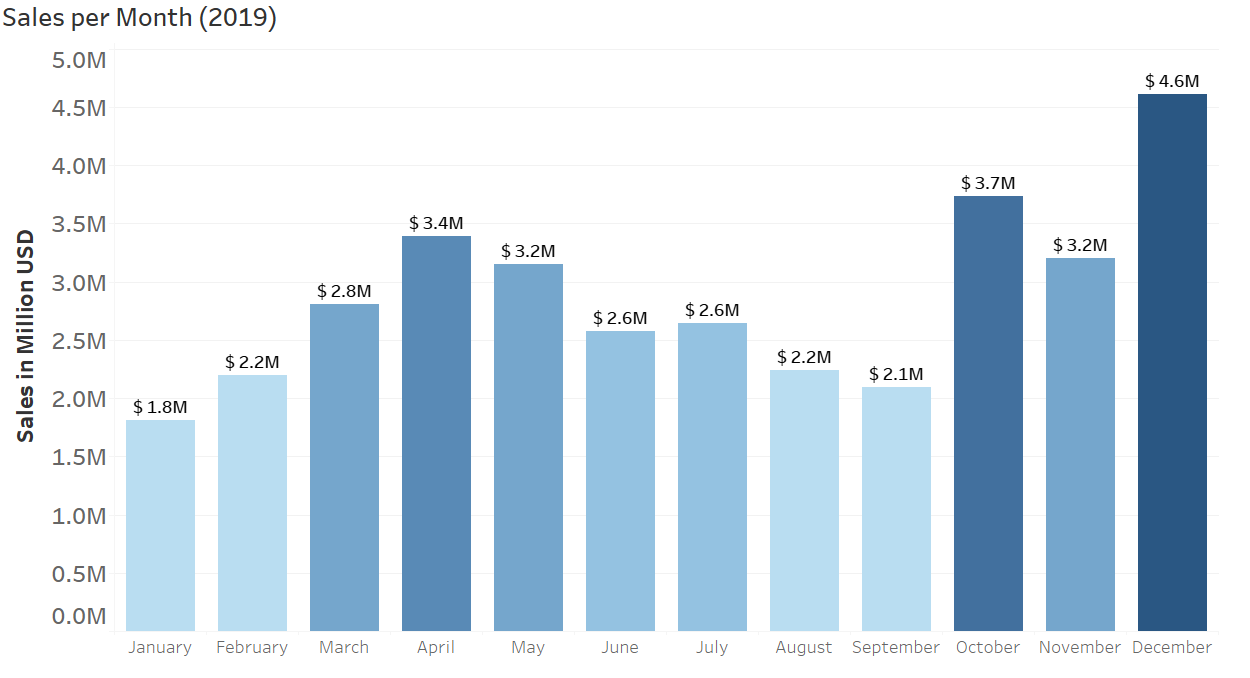

Let's  calculate the firm's total revenue in 2019:

In [90]:
# dataset['Sales'].sum()  Total revenue in 2019: US$ 34,483,365.68

34483365.68

Also, please find below the representativeness of each month's revenue as a % of total sales:

### Chart 2)

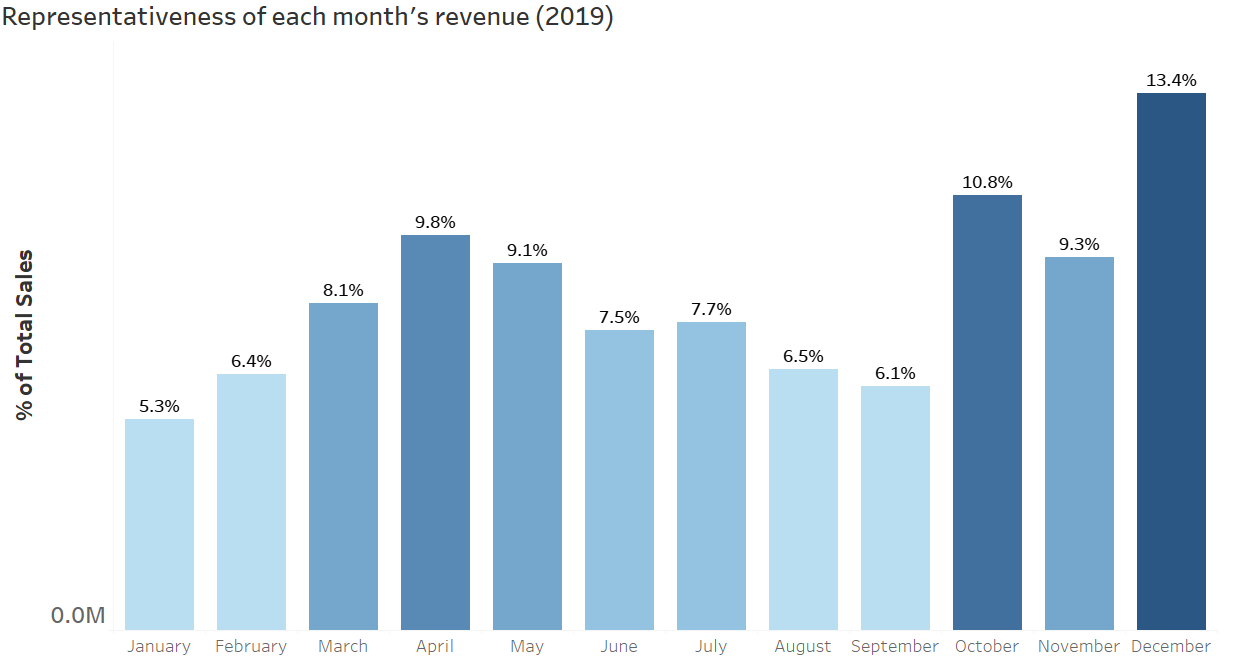

### Answer Q1:

The company's total revenue in 2019 was  34,483,365.68 U.S. dollars. The best month for sales in 2019 was December, when the company earned US$4,613,443.34. In addition, this month corresponded to 13.4% of this year's total revenue. This result was expected, because sales are usually boosted by Christmas Holidays. 

We can identify that October and November are the second and fourth best months for sales, respectively. A higher buyer activity during these months is probably due to the countdown to Christmas and New Year's Eve, considering that some people start buying presents and preparing for these holidays earlier. Furthermore, there are three important federal holidays in the U.S in this period (Columbus and US Indigenous People's Day: Oct 12, Veterans Day: Nov 11, ThanksGiving: Nov 26 and 27), besides the Black Friday, which extensively increases sales. Taking this into account, 33,5 % of the company's total sales in 2019 occurred in the last 3 months of the year.

The sales were lower in the beginning of the year, especially in January and February, which is probably due to the fact that people have less money to spend during this period, considering the proximity to the holiday season of the previous year. However, the revenue starts increasing again in March and reaches the first semester's peak in April: 3.4 million dollars (2nd highest monthly revenue in 2019). Two reasons may explain this rise: 1)the first quarter of the year has already ended, and people may have recovered the money they spent during holidays and 2) Mother's Day in May.

Suggestions: Apparently, consumers have more money to spend in two periods: from March to May and from October to December. So, the company could try to invest more in marketing campaigns during these months, adapting them to each context. For instance, in the end of the year, the firm could promote family-friendly products due to the Christmas Holiday. These campaigns will help the company to capture the public's attention in the moments that they are more willing to acquire products. Finally, the firm could analyze if the marketing campaigns are positively impacting profits by measuring the 'Return On Marketing Investments (ROMI)' metric.

### 5.2) Question 2: Which city had the highest revenue? What was the representativeness of each city in terms of revenue?

In [93]:
dataset.head()

Order ID                     Product  Quantity Ordered  Price Each   Sales  \
0   176558        USB-C Charging Cable                 2       11.95   23.90   
1   176559  Bose SoundSport Headphones                 1       99.99   99.99   
2   176560                Google Phone                 1      600.00  600.00   
3   176560            Wired Headphones                 1       11.99   11.99   
4   176561            Wired Headphones                 1       11.99   11.99   

           Order Date  Month  Year                      Purchase Address  
0 2019-04-19 08:46:00      4  2019          917 1st St, Dallas, TX 75001  
1 2019-04-07 22:30:00      4  2019     682 Chestnut St, Boston, MA 02215  
2 2019-04-12 14:38:00      4  2019  669 Spruce St, Los Angeles, CA 90001  
3 2019-04-12 14:38:00      4  2019  669 Spruce St, Los Angeles, CA 90001  
4 2019-04-30 09:27:00      4  2019     333 8th St, Los Angeles, CA 90001

Let's create a column for the cities of purchase. I will also include their correspondent states in the same column, because some cities may have equal names, so we have to distinguish them. Also, I will add a column for the zip codes, another one specifically for the city and another one for the state. I'll need them to create a map with Tableau:

In [102]:
def get_city(address):
    
    return address.split(',')[1]

def get_state(address):
    
    return address.split(',')[2].split(' ')[1]

def get_zip(address):
    
    return address.split(',')[2].split(' ')[2]

In [103]:
dataset['City(State)']=dataset['Purchase Address'].apply(lambda x: get_city(x)+'('+get_state(x)+')')

dataset['Zip Code']=dataset['Purchase Address'].apply(lambda x: get_zip(x))


dataset.head() # We don't have to worry about the SettingWithCopyWarning, because the operation worked, as we can see below.

<ipython-input-103-58f356f59892>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['City(State)']=dataset['Purchase Address'].apply(lambda x: get_city(x)+'('+get_state(x)+')')
<ipython-input-103-58f356f59892>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Zip Code']=dataset['Purchase Address'].apply(lambda x: get_zip(x))


Order ID                     Product  Quantity Ordered  Price Each   Sales  \
0   176558        USB-C Charging Cable                 2       11.95   23.90   
1   176559  Bose SoundSport Headphones                 1       99.99   99.99   
2   176560                Google Phone                 1      600.00  600.00   
3   176560            Wired Headphones                 1       11.99   11.99   
4   176561            Wired Headphones                 1       11.99   11.99   

           Order Date  Month  Year                      Purchase Address  \
0 2019-04-19 08:46:00      4  2019          917 1st St, Dallas, TX 75001   
1 2019-04-07 22:30:00      4  2019     682 Chestnut St, Boston, MA 02215   
2 2019-04-12 14:38:00      4  2019  669 Spruce St, Los Angeles, CA 90001   
3 2019-04-12 14:38:00      4  2019  669 Spruce St, Los Angeles, CA 90001   
4 2019-04-30 09:27:00      4  2019     333 8th St, Los Angeles, CA 90001   

        City(State) Zip Code  
0        Dallas(TX)    75001  
1        Boston(MA)    02215  
2   Los Angeles(CA)    90001  
3   Los Angeles(CA)    90001  
4   Los Angeles(CA)    90001

Just for learning purposes, I will use a different approach to get the city and state names. Let's practice!

In [111]:
def get_only_city(city_state):
    
    city_state_iterate=[letter for letter in city_state]
    
    city_list=[]
    
    for i in city_state:
        
        if i=='(':
            
            break
        else:

            city_list.append(i)
    
    return ''.join(city_list)

In [112]:
word='Dallas(TX)'

get_only_city(word) # Ok! It is working!

'Dallas'

In [116]:
import re

re.split(r'[()]', word)

['Dallas', 'TX', '']

In [120]:
def get_only_state(city_state):
    
    return (re.split(r'[()]', city_state))[1]

In [123]:
word

'Dallas(TX)'

In [121]:
get_only_state(word) # This one is working too!

'TX'

In [125]:
dataset['City Only']=dataset['City(State)'].apply(lambda x: get_only_city(x))

dataset['State Only']=dataset['City(State)'].apply(lambda x: get_only_state(x))


cols2=['Order ID', 'Product', 'Quantity Ordered',
      'Price Each','Sales','Order Date', 'Month', 'Year','Purchase Address', 'City(State)', 'Zip Code', 'City Only','State Only']

dataset=dataset[cols2]

dataset.head()

Order ID                     Product  Quantity Ordered  Price Each   Sales  \
0   176558        USB-C Charging Cable                 2       11.95   23.90   
1   176559  Bose SoundSport Headphones                 1       99.99   99.99   
2   176560                Google Phone                 1      600.00  600.00   
3   176560            Wired Headphones                 1       11.99   11.99   
4   176561            Wired Headphones                 1       11.99   11.99   

           Order Date  Month  Year                      Purchase Address  \
0 2019-04-19 08:46:00      4  2019          917 1st St, Dallas, TX 75001   
1 2019-04-07 22:30:00      4  2019     682 Chestnut St, Boston, MA 02215   
2 2019-04-12 14:38:00      4  2019  669 Spruce St, Los Angeles, CA 90001   
3 2019-04-12 14:38:00      4  2019  669 Spruce St, Los Angeles, CA 90001   
4 2019-04-30 09:27:00      4  2019     333 8th St, Los Angeles, CA 90001   

        City(State) Zip Code     City Only State Only  
0        Dallas(TX)    75001        Dallas         TX  
1        Boston(MA)    02215        Boston         MA  
2   Los Angeles(CA)    90001   Los Angeles         CA  
3   Los Angeles(CA)    90001   Los Angeles         CA  
4   Los Angeles(CA)    90001   Los Angeles         CA

In [54]:
best_city=dataset.groupby('City(State)')['Sales'].sum().round(2)

best_city.sort_values(ascending=False)

City(State)
 San Francisco(CA)    8259719.03
 Los Angeles(CA)      5451570.81
 New York City(NY)    4662976.81
 Boston(MA)           3660315.12
 Atlanta(GA)          2795498.58
 Dallas(TX)           2766260.45
 Seattle(WA)          2747605.49
 Portland(OR)         1870579.35
 Austin(TX)           1819081.77
 Portland(ME)          449758.27
Name: Sales, dtype: float64

In [105]:
best_city.idxmax()

' San Francisco(CA)'

In [106]:
best_city.max() # Revenue that was generated in San Francisco  in 2019: US$ 8,259,719.03

8259719.03

The chart below informs the company's sales per city in 2019:

### Chart 3)

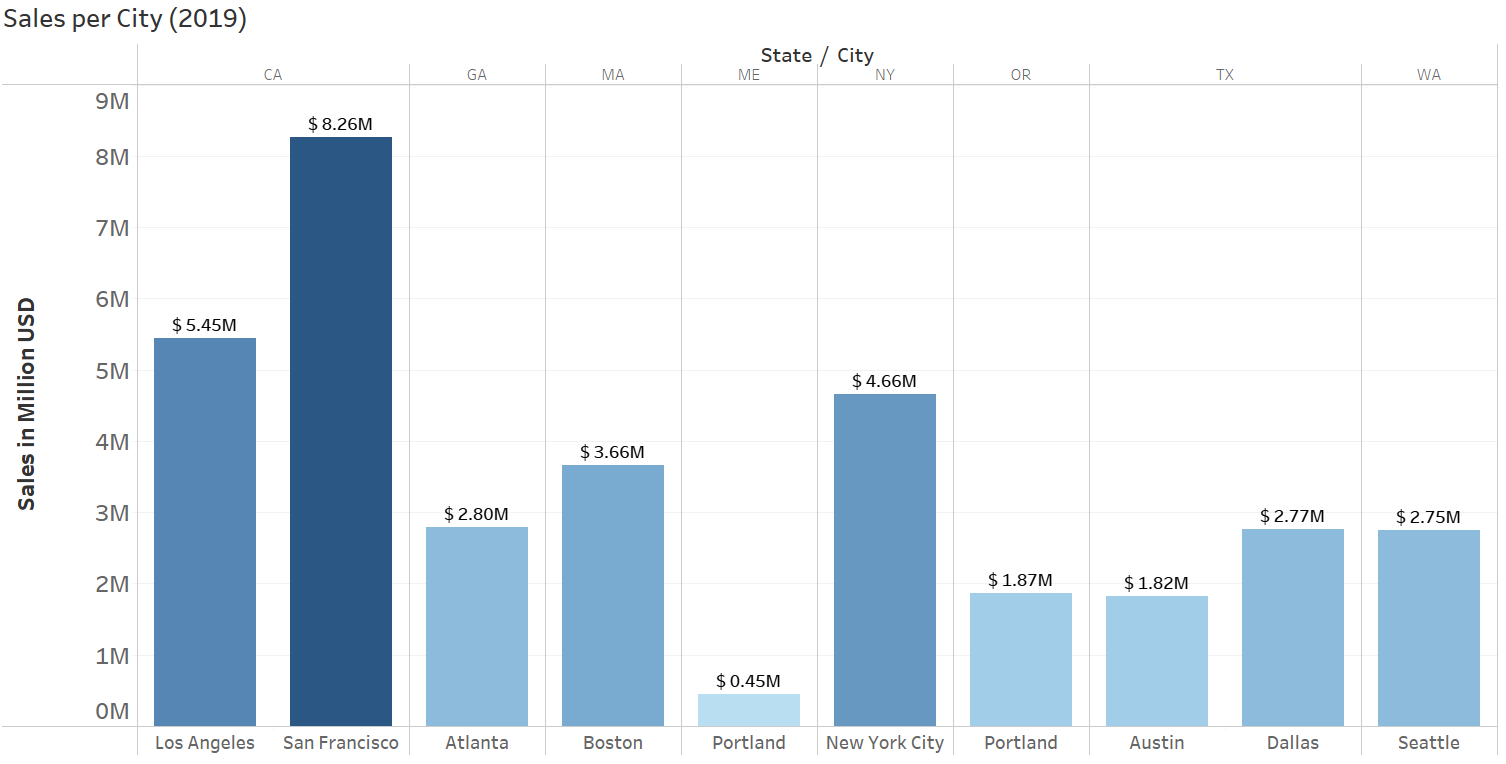

For the states where the company is present in more than one city, I created a chart that indicates the representativeness of each city's revenue in its correspondent state:

### Chart 4)

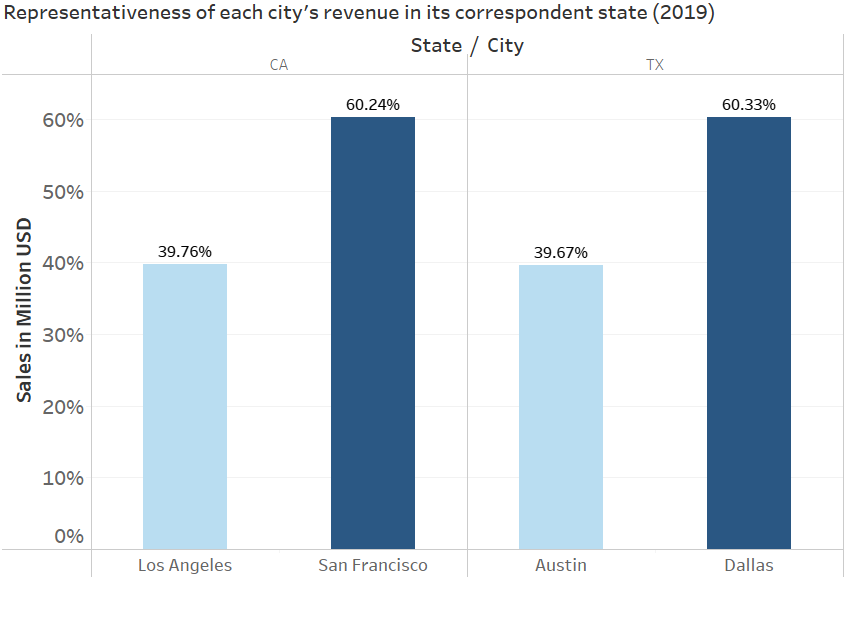

I also structured a map  to visualize the representativeness of each city's sales in comparison to the total. To analyze the map below, please consider that darker tons of blue and larger sizes mean that the revenue is higher in these locations:

### Chart 5)

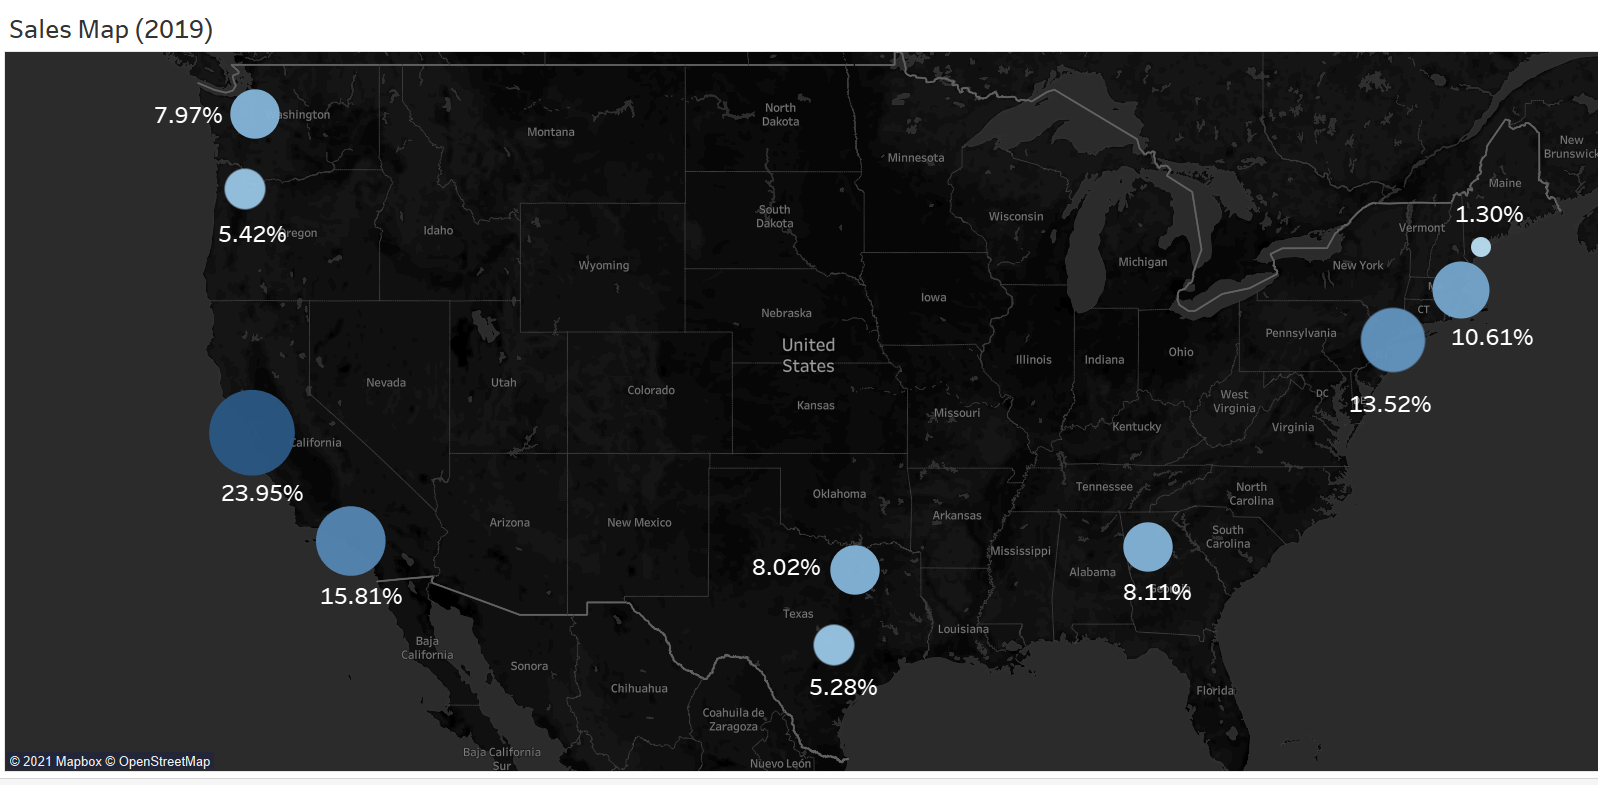

### Answer Q2:

The city that presented the highest revenue in 2019 was San Francisco, California. The city's total sales during this period was US$ 8,259,719.03. Los Angeles (CA), New York City (NY) and Boston (MA) hold the second, third and fourth positions in the ranking, respectively. This indicates that a high proportion of the company's sales occurred in California (West Coast) and New York/Massachusetts (East Coast). In addition, it is relevant to state that the sales in California represented almost 40% of the firm's revenue in 2019.

This information can be valueable not only to the Sales and Marketing departments, but also to Logistics and Operations sectors. They will be able to organize the products' storage and distribution plans more efficiently, which can help the company to reduce its costs and execute faster deliveries.

### 5.3) Question 3:  What time should we display advertisements to maximize likelihood of customers buying products? Please, conduct a specific analysis for each city.

To answer this question, we have to create specific columns for 'Hour' and 'Minutes'

In [9]:
dataset.head()

Order ID                     Product  Quantity Ordered  Price Each   Sales  \
0    176558        USB-C Charging Cable                 2       11.95   23.90   
1    176559  Bose SoundSport Headphones                 1       99.99   99.99   
2    176560                Google Phone                 1      600.00  600.00   
3    176560            Wired Headphones                 1       11.99   11.99   
4    176561            Wired Headphones                 1       11.99   11.99   

            Order Date  Month  Year                      Purchase Address  \
0  2019-04-19 08:46:00      4  2019          917 1st St, Dallas, TX 75001   
1  2019-04-07 22:30:00      4  2019     682 Chestnut St, Boston, MA 02215   
2  2019-04-12 14:38:00      4  2019  669 Spruce St, Los Angeles, CA 90001   
3  2019-04-12 14:38:00      4  2019  669 Spruce St, Los Angeles, CA 90001   
4  2019-04-30 09:27:00      4  2019     333 8th St, Los Angeles, CA 90001   

        City(State)  Zip Code     City Only State Only  
0        Dallas(TX)     75001        Dallas         TX  
1        Boston(MA)      2215        Boston         MA  
2   Los Angeles(CA)     90001   Los Angeles         CA  
3   Los Angeles(CA)     90001   Los Angeles         CA  
4   Los Angeles(CA)     90001   Los Angeles         CA

In [15]:
dataset['Day']=dataset['Order Date'].dt.day # Let's add a 'day' column too, just for it to be more complete

dataset['Hour']=dataset['Order Date'].dt.hour

dataset['Minute']=dataset['Order Date'].dt.minute

cols3=['Order ID', 'Product', 'Quantity Ordered',
      'Price Each','Sales','Order Date', 'Day','Month', 'Year','Hour', 'Minute','Purchase Address', 'City(State)', 'City Only','State Only', 'Zip Code']

dataset=dataset[cols3]

dataset.head()

Order ID                     Product  Quantity Ordered  Price Each   Sales  \
0    176558        USB-C Charging Cable                 2       11.95   23.90   
1    176559  Bose SoundSport Headphones                 1       99.99   99.99   
2    176560                Google Phone                 1      600.00  600.00   
3    176560            Wired Headphones                 1       11.99   11.99   
4    176561            Wired Headphones                 1       11.99   11.99   

           Order Date  Day  Month  Year  Hour  Minute  \
0 2019-04-19 08:46:00   19      4  2019     8      46   
1 2019-04-07 22:30:00    7      4  2019    22      30   
2 2019-04-12 14:38:00   12      4  2019    14      38   
3 2019-04-12 14:38:00   12      4  2019    14      38   
4 2019-04-30 09:27:00   30      4  2019     9      27   

                       Purchase Address       City(State)     City Only  \
0          917 1st St, Dallas, TX 75001        Dallas(TX)        Dallas   
1     682 Chestnut St, Boston, MA 02215        Boston(MA)        Boston   
2  669 Spruce St, Los Angeles, CA 90001   Los Angeles(CA)   Los Angeles   
3  669 Spruce St, Los Angeles, CA 90001   Los Angeles(CA)   Los Angeles   
4     333 8th St, Los Angeles, CA 90001   Los Angeles(CA)   Los Angeles   

  State Only  Zip Code  
0         TX     75001  
1         MA      2215  
2         CA     90001  
3         CA     90001  
4         CA     90001

Now, let's create an initial visualization with Matplotlib. It will be interesting to practice with this library, because this graph will require additional techniques that we did not use in question 1.

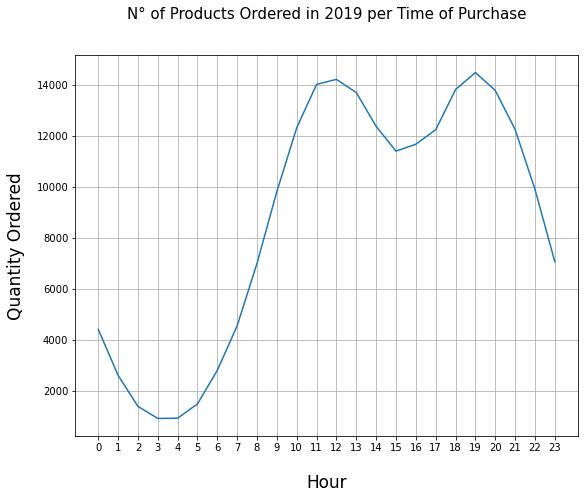

In [38]:
hours=[hour for hour,df in dataset.groupby('Hour')] #technique to select only unique hours

result3=dataset.groupby('Hour')['Quantity Ordered'].sum()

figure(figsize=(9,7))

plt.plot(hours, result3)

plt.grid()

plt.xlabel('Hour', size=17)

ax=plt.gca()

ax.xaxis.set_label_coords(0.5, -0.1)

plt.ylabel('Quantity Ordered', size=17)

plt.xticks(hours)

ay=plt.gca()

ay.yaxis.set_label_coords(-0.1, 0.5)

plt.title('N° of Products Ordered in 2019 per Time of Purchase', size=15, y=1.08)

plt.show()

We identified that the peaks are at 19:00 (highest) and at 12:00 (2nd highest).

Now, let's see the same chart created with Tableau:

### Chart 6)

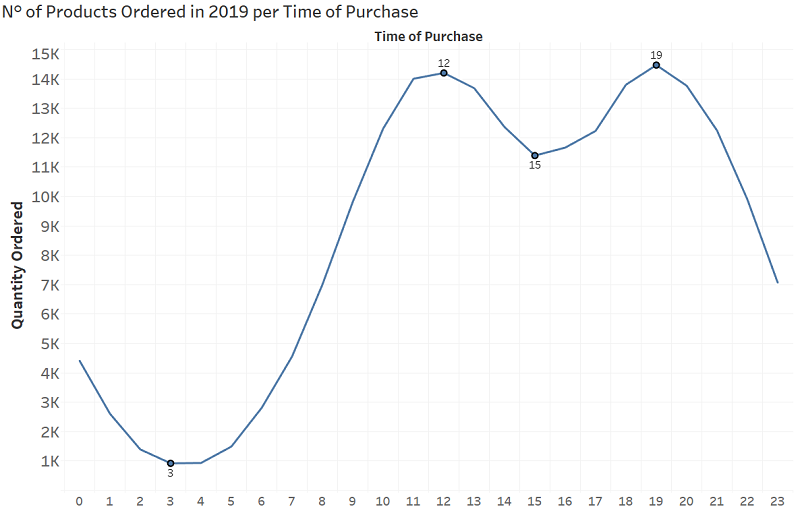

As it was mentioned before, people are more willing to buy products around 19:00 (peak) and 12:00 (2nd best period). The worst moment is at 3:00. We will analyze these results in the final answer for question 3. Before that, please check the next charts, where we show the total number of products ordered per hour in each city in 2019. Please, notice that each chart displays the worst and best hours of the day for each city:

### Chart 7)

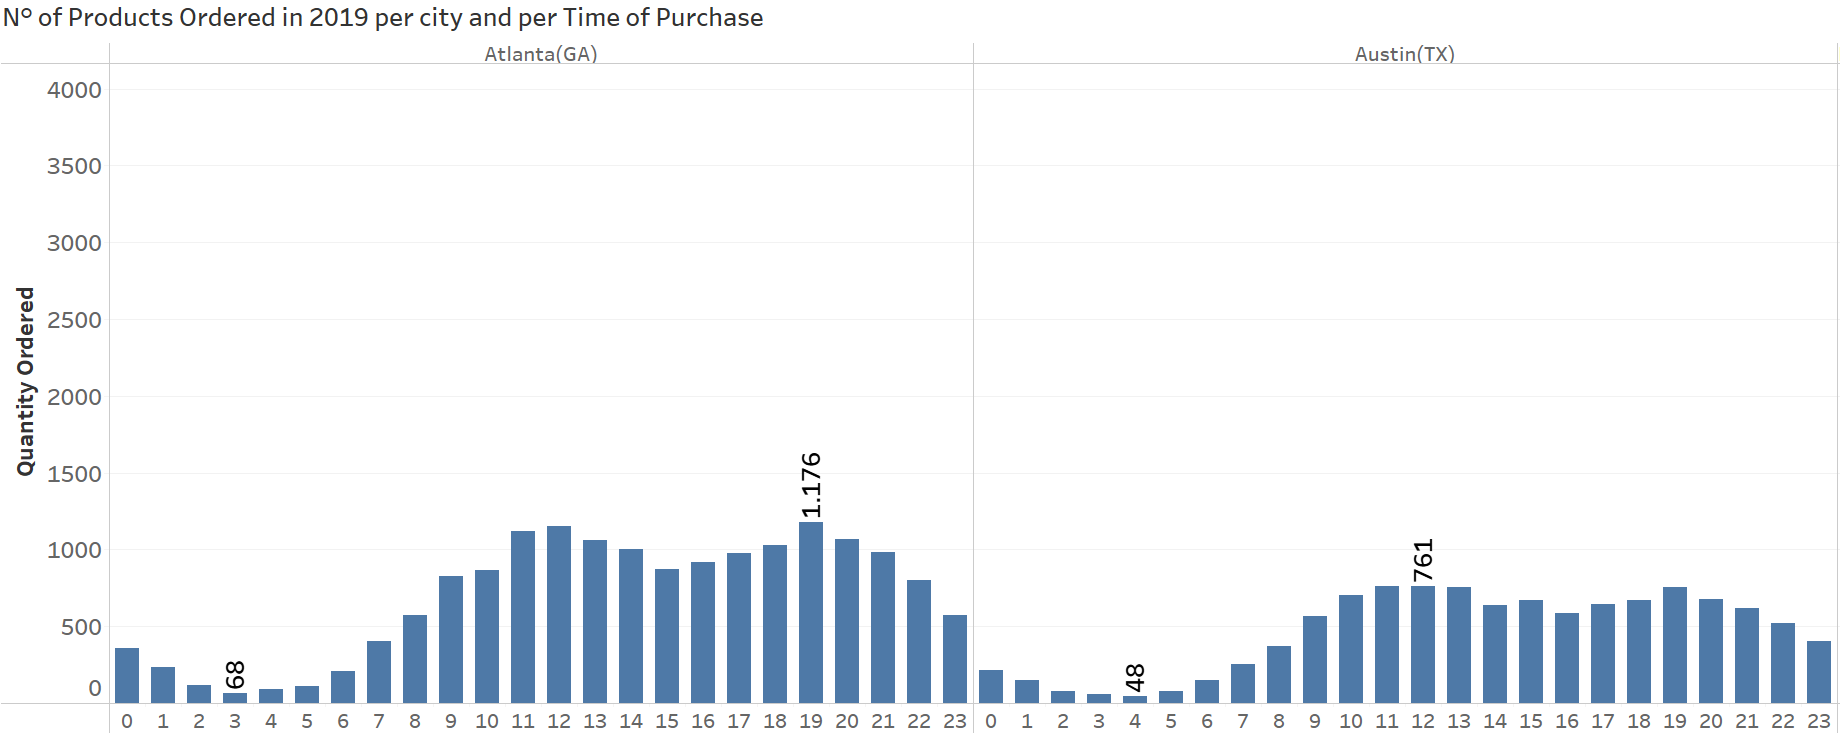

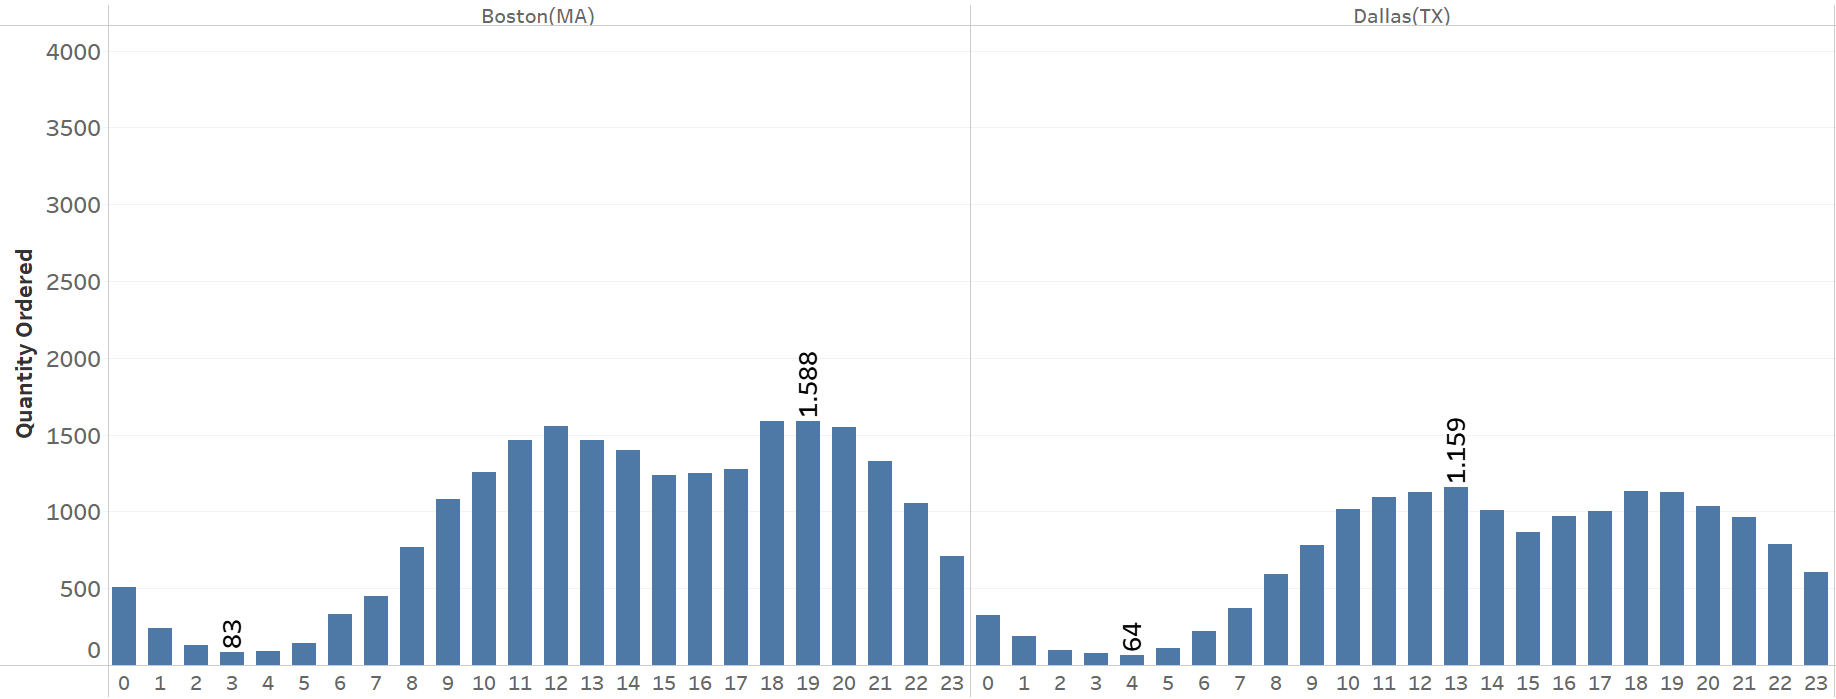

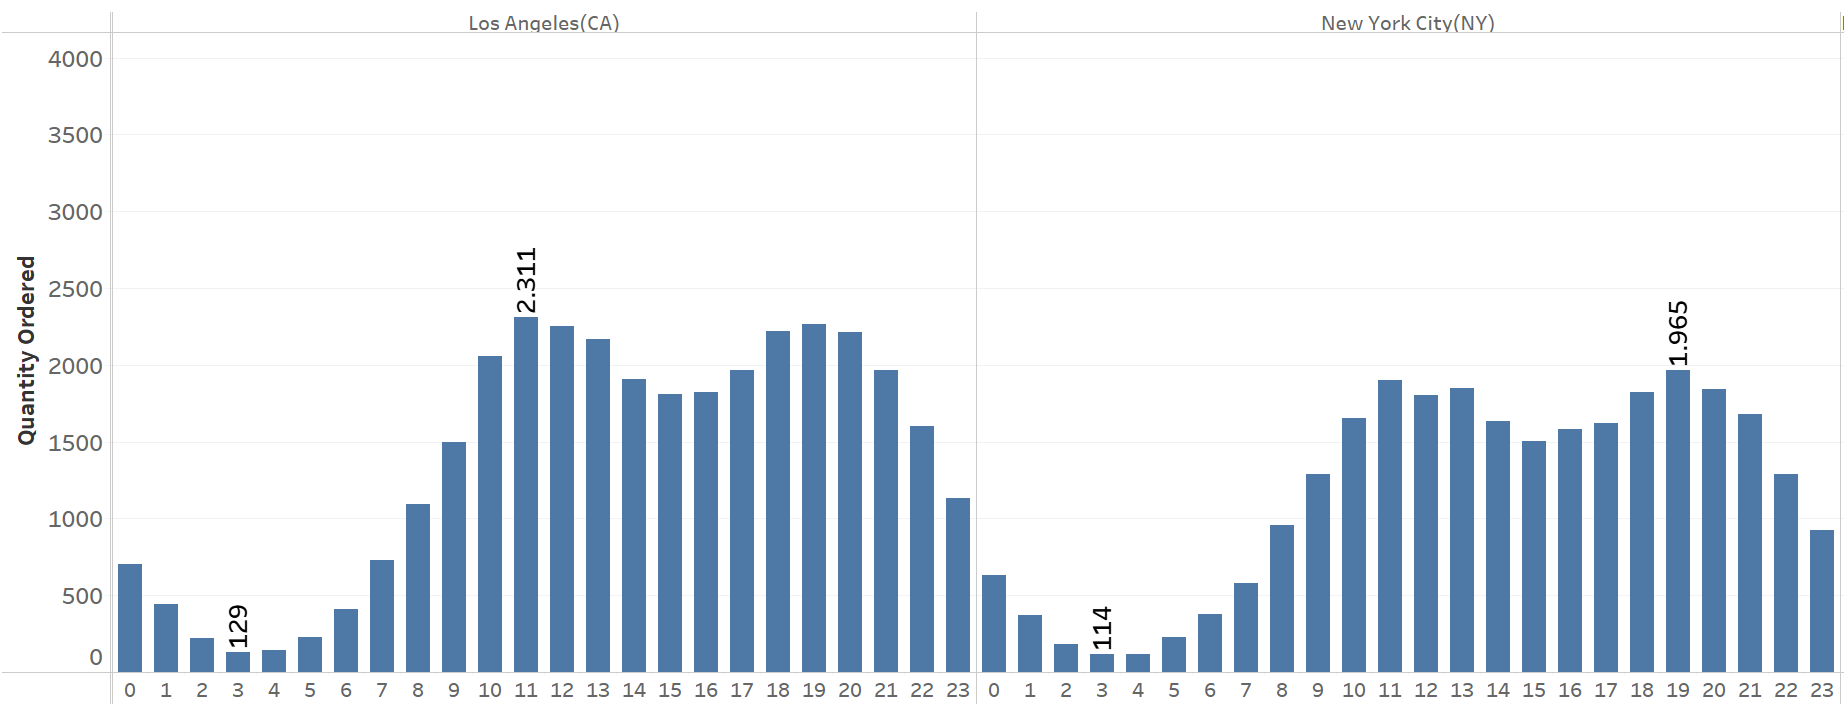

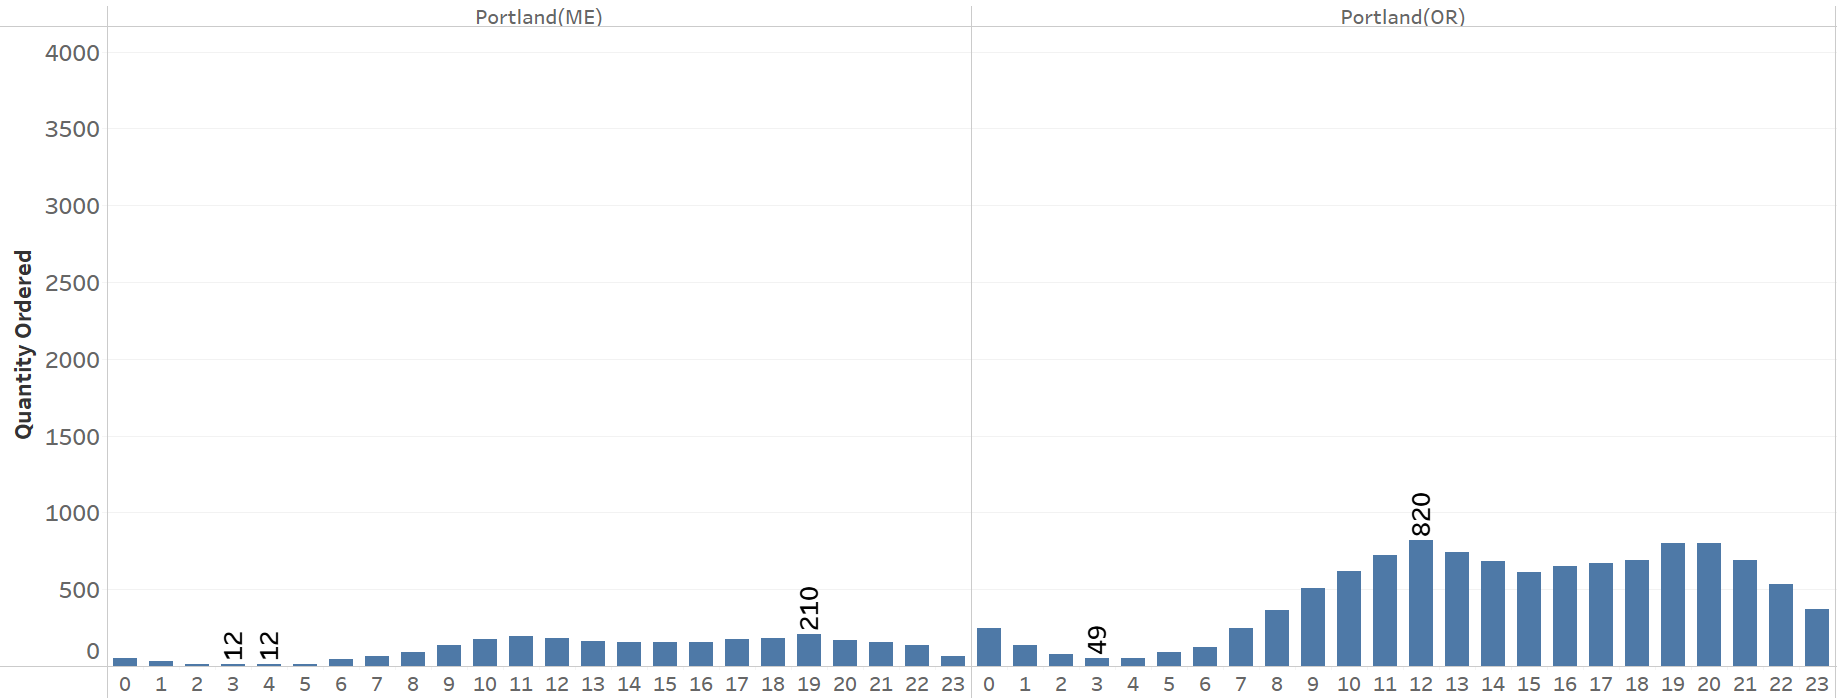

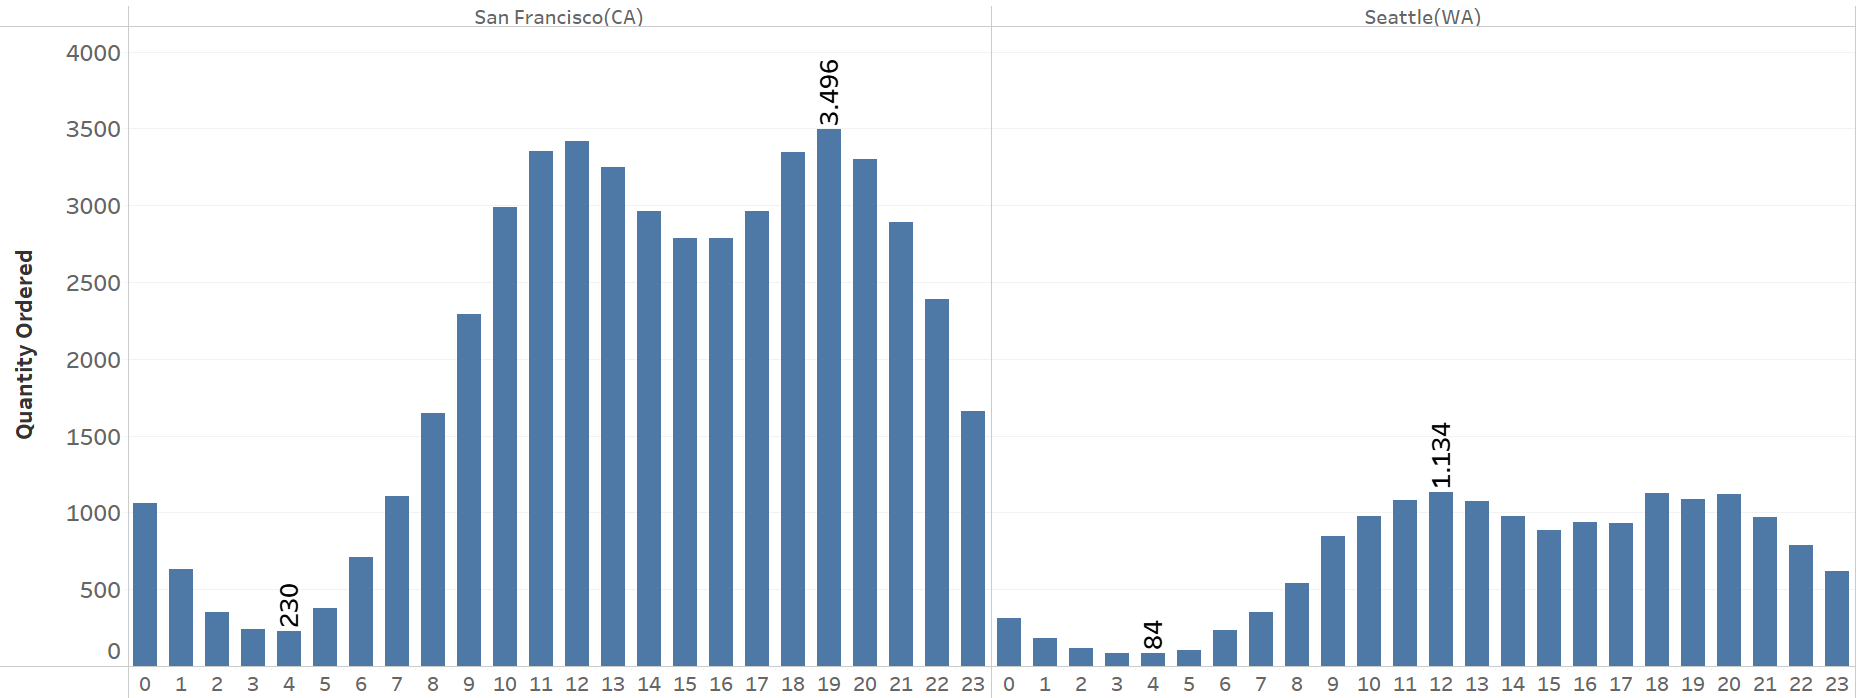

The individual charts for each city follow a similar pattern/shape in comparison to the graph with aggregated values in Chart n° 6.

### Answer Q3:

If we analize the aggregated values, the best time to put adverstisements online is around 19:00 and 12:00, because more customers are online during these periods. The reason for this is because people usually have some free time at 12:00 (lunch break at work) and 19:00 (when they usually arrive home after work). However, it would be better for the firm to analyze the results for each city individually, considering that the best hours for sales vary among them:

- At 19:00: Atlanta, Boston, Portland(ME), New York and San Francisco.

- At 13:00: Dallas.

- At 12:00: Seattle, Portland(OR) and Austin.

- At 11:00: Los Angeles.


Regarding the least favorable hours, we can see that they are between 2 am and 4 am, when people are usually sleeping.


Suggestion: Adverstisements should be launched at the most favorable hour in each city  (as informed above), in order to adapt to the customers' behavior in each location.

### Question 4: Which product sold the most in 2019? Which were the best-selling products in each city? Why do you think this happened?

In [46]:
dataset.head()

Order ID                     Product  Quantity Ordered  Price Each   Sales  \
0    176558        USB-C Charging Cable                 2       11.95   23.90   
1    176559  Bose SoundSport Headphones                 1       99.99   99.99   
2    176560                Google Phone                 1      600.00  600.00   
3    176560            Wired Headphones                 1       11.99   11.99   
4    176561            Wired Headphones                 1       11.99   11.99   

           Order Date  Day  Month  Year  Hour  Minute  \
0 2019-04-19 08:46:00   19      4  2019     8      46   
1 2019-04-07 22:30:00    7      4  2019    22      30   
2 2019-04-12 14:38:00   12      4  2019    14      38   
3 2019-04-12 14:38:00   12      4  2019    14      38   
4 2019-04-30 09:27:00   30      4  2019     9      27   

                       Purchase Address       City(State)     City Only  \
0          917 1st St, Dallas, TX 75001        Dallas(TX)        Dallas   
1     682 Chestnut St, Boston, MA 02215        Boston(MA)        Boston   
2  669 Spruce St, Los Angeles, CA 90001   Los Angeles(CA)   Los Angeles   
3  669 Spruce St, Los Angeles, CA 90001   Los Angeles(CA)   Los Angeles   
4     333 8th St, Los Angeles, CA 90001   Los Angeles(CA)   Los Angeles   

  State Only  Zip Code  
0         TX     75001  
1         MA      2215  
2         CA     90001  
3         CA     90001  
4         CA     90001

In [51]:
best_selling=dataset.groupby('Product')['Quantity Ordered'].sum()
best_selling.sort_values(ascending=False) # Sorted by 'Quantity Ordered'

Product
AAA Batteries (4-pack)        31012
AA Batteries (4-pack)         27635
USB-C Charging Cable          23971
Lightning Charging Cable      23211
Wired Headphones              20553
Apple Airpods Headphones      15657
Bose SoundSport Headphones    13454
27in FHD Monitor               7547
iPhone                         6847
27in 4K Gaming Monitor         6243
34in Ultrawide Monitor         6199
Google Phone                   5531
Flatscreen TV                  4818
Macbook Pro Laptop             4727
ThinkPad Laptop                4128
20in Monitor                   4126
Vareebadd Phone                2067
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [60]:
best_selling.idxmax() # Best-selling product in 2019: 'AAA Batteries (4-pack)'

'AAA Batteries (4-pack)'

In [61]:
best_selling.max() # 31,012 units of AAA Bateries (4-pack) were ordered by customers in 2019

31012

The company's best-selling product in 2019 was the 'AAA Batteries' pack with 4 units each. The customers ordered 31,012 units of this product. Please, check the chart below, where you can find the total number of products sold distributed by type:

### Chart 8)

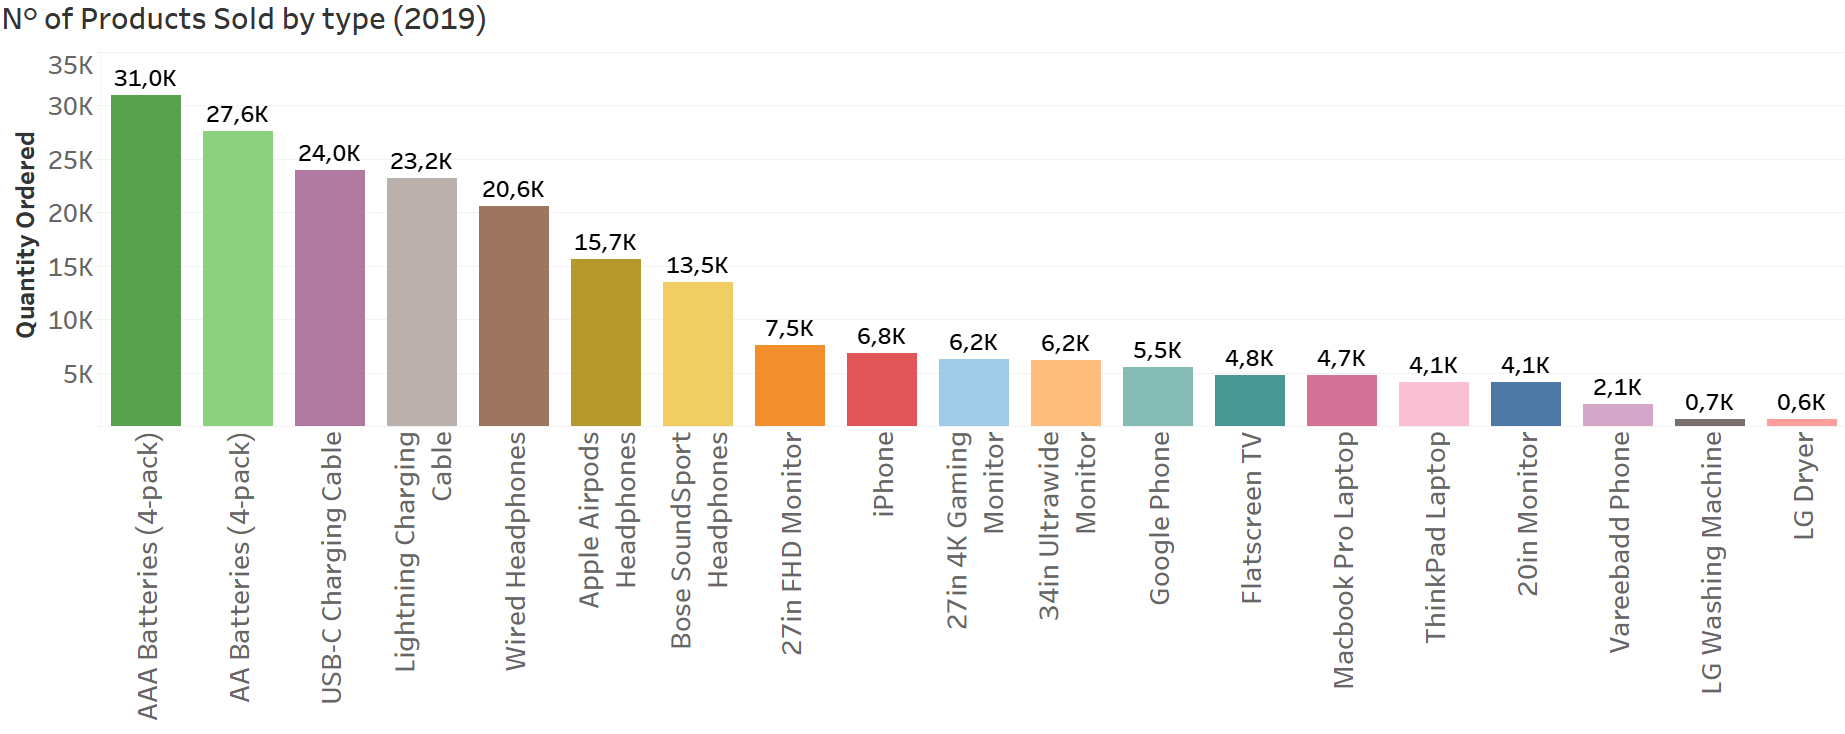

I also created a tree map with the percentages of units sold per product in comparison to the total:

### Chart 9)

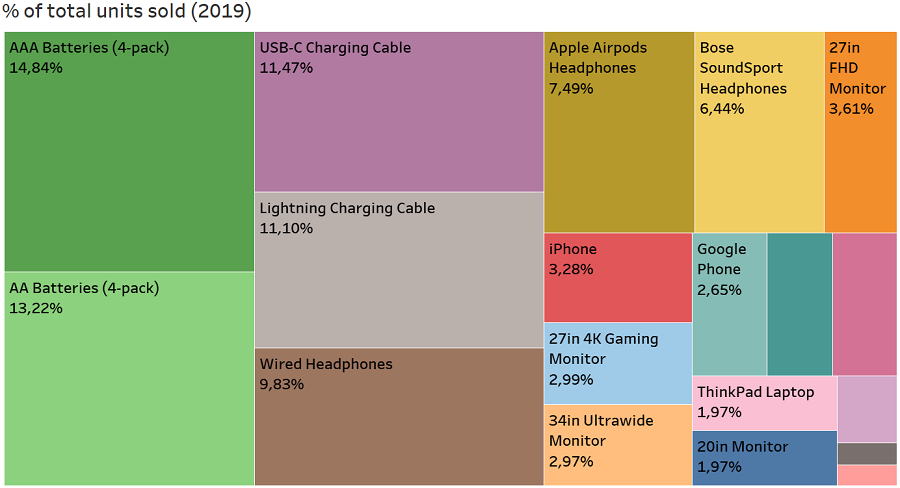

"AAA Batteries (4-pack)" was the best-selling product in all cities, except from Portland (ME). In Portland (ME) the product that sold more units was the "AA Batteries" pack, as can be seen in the tree map below:

### Chart 10)

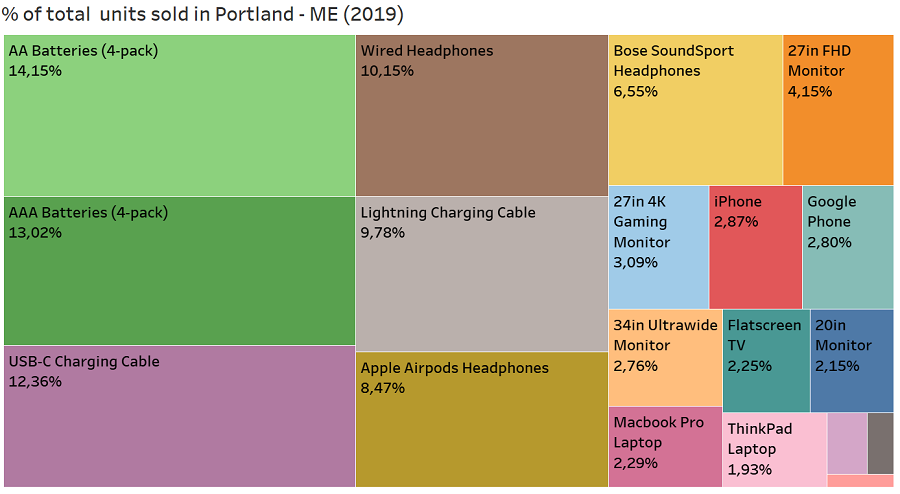

Now, let's calculate the average prices by which each product was sold in 2019:

In [124]:
prices=dataset.groupby('Product')['Price Each'].mean()

prices.sort_values(ascending=False)

Product
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
iPhone                         700.00
LG Dryer                       600.00
LG Washing Machine             600.00
Google Phone                   600.00
Vareebadd Phone                400.00
27in 4K Gaming Monitor         389.99
34in Ultrawide Monitor         379.99
Flatscreen TV                  300.00
Apple Airpods Headphones       150.00
27in FHD Monitor               149.99
20in Monitor                   109.99
Bose SoundSport Headphones      99.99
Lightning Charging Cable        14.95
Wired Headphones                11.99
USB-C Charging Cable            11.95
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Name: Price Each, dtype: float64

Therefore, we confirmed that the firm's best-selling products are also the cheapest ones: batteries, charging cables and headphones. Now, I will create a chart informing the average prices of each product in 2019:

### Chart 11)

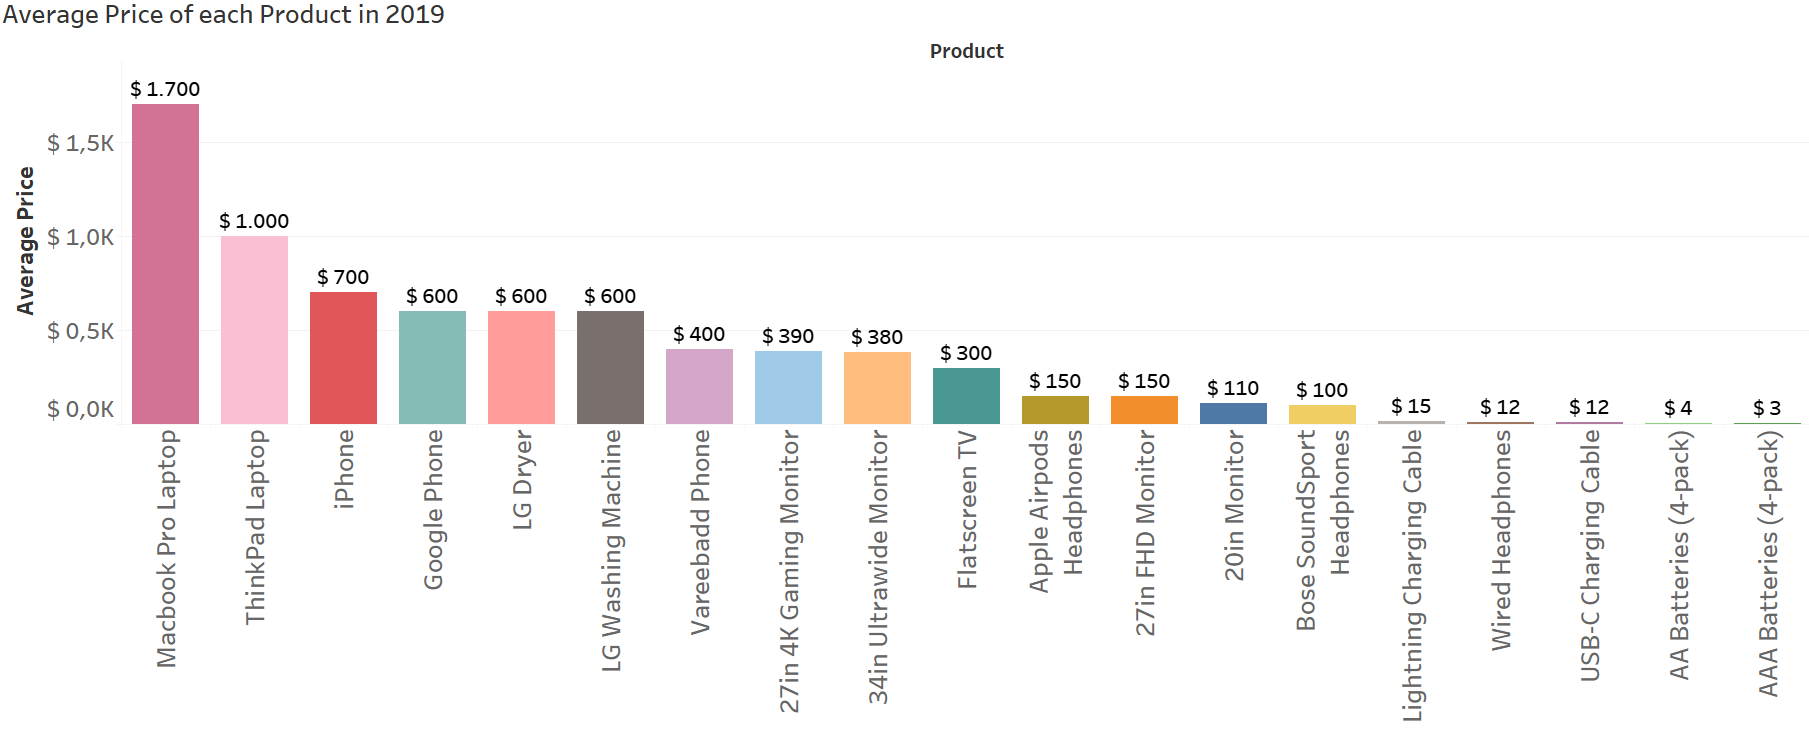

Let's create a dual axis chart to compare the average prices and the quantity ordered for each product. The line in blue refers to the average sale price for each product. The y axis on the left measures the quantity of products ordered (in units) and the y axis on the right measures the average sale price in USD:

### Chart 12)


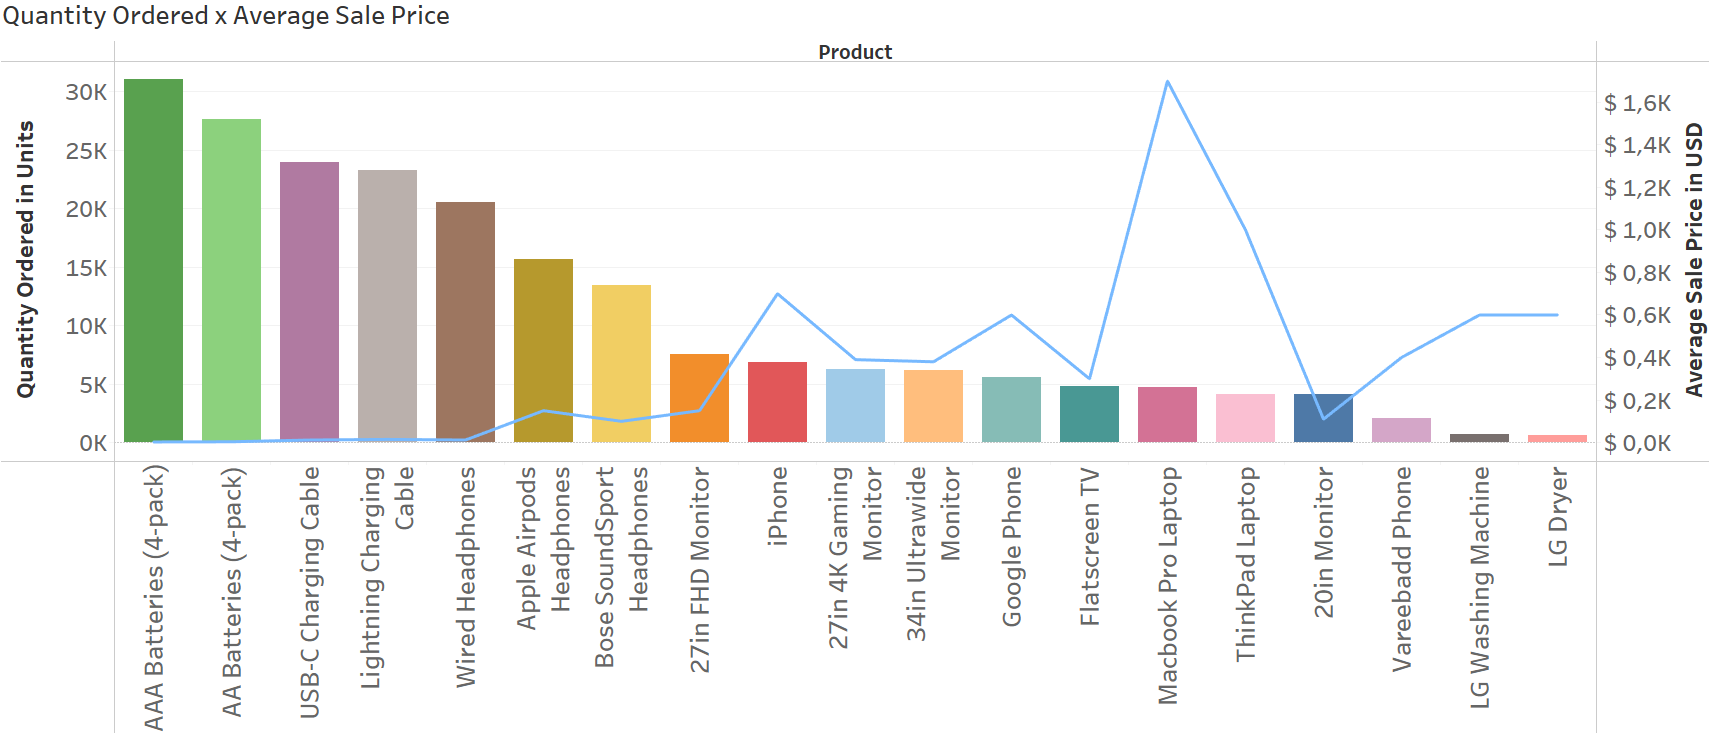

### Answer Q4:

As it was mentioned before, the customers' favorite product in 2019 was the 'AAA Batteries' pack. Also, this was the best-selling product in every city, except in Portland (ME), where consumers acquired 'AA Batteries' more. Apparently, this happened because batteries are complementary and cheaper products. Therefore, people may be more willing to include batteries to their 'online cart' as an additional item, while they search for other products. It is possible to confirm this by analyzing chart n° 12 above, where we identify that the customer's 'favorite' products are also the cheaper ones. Moreover, another relevant fact is that batteries are products that satisfy the needs of almost all types of customers, that is, they are not focused on only one specific niche. So, these reasons may explain why this is the company's best-selling product.

### Question 5) Which products are most often sold together? In how many pairs each item is in?

Products that were sold together share the same order ID:

In [6]:
dataset.head()

Order ID                     Product  Quantity Ordered  Price Each   Sales  \
0    176558        USB-C Charging Cable                 2       11.95   23.90   
1    176559  Bose SoundSport Headphones                 1       99.99   99.99   
2    176560                Google Phone                 1      600.00  600.00   
3    176560            Wired Headphones                 1       11.99   11.99   
4    176561            Wired Headphones                 1       11.99   11.99   

            Order Date  Day  Month  Year  Hour  Minute  \
0  2019-04-19 08:46:00   19      4  2019     8      46   
1  2019-04-07 22:30:00    7      4  2019    22      30   
2  2019-04-12 14:38:00   12      4  2019    14      38   
3  2019-04-12 14:38:00   12      4  2019    14      38   
4  2019-04-30 09:27:00   30      4  2019     9      27   

                       Purchase Address       City(State)     City Only  \
0          917 1st St, Dallas, TX 75001        Dallas(TX)        Dallas   
1     682 Chestnut St, Boston, MA 02215        Boston(MA)        Boston   
2  669 Spruce St, Los Angeles, CA 90001   Los Angeles(CA)   Los Angeles   
3  669 Spruce St, Los Angeles, CA 90001   Los Angeles(CA)   Los Angeles   
4     333 8th St, Los Angeles, CA 90001   Los Angeles(CA)   Los Angeles   

  State Only  Zip Code  
0         TX     75001  
1         MA      2215  
2         CA     90001  
3         CA     90001  
4         CA     90001

Let's create a DataFrame with duplicated 'Order IDs' only:

In [7]:
df_duplicates=dataset[dataset['Order ID'].duplicated(keep=False)]

df_duplicates

Order ID                     Product  Quantity Ordered  Price Each  \
2         176560                Google Phone                 1      600.00   
3         176560            Wired Headphones                 1       11.99   
17        176574                Google Phone                 1      600.00   
18        176574        USB-C Charging Cable                 1       11.95   
29        176585  Bose SoundSport Headphones                 1       99.99   
...          ...                         ...               ...         ...   
185859    259303       AA Batteries (4-pack)                 1        3.84   
185870    259314            Wired Headphones                 1       11.99   
185871    259314      AAA Batteries (4-pack)                 2        2.99   
185907    259350                Google Phone                 1      600.00   
185908    259350        USB-C Charging Cable                 1       11.95   

         Sales           Order Date  Day  Month  Year  Hour  Minute  \
2       600.00  2019-04-12 14:38:00   12      4  2019    14      38   
3        11.99  2019-04-12 14:38:00   12      4  2019    14      38   
17      600.00  2019-04-03 19:42:00    3      4  2019    19      42   
18       11.95  2019-04-03 19:42:00    3      4  2019    19      42   
29       99.99  2019-04-07 11:31:00    7      4  2019    11      31   
...        ...                  ...  ...    ...   ...   ...     ...   
185859    3.84  2019-09-20 20:18:00   20      9  2019    20      18   
185870   11.99  2019-09-16 00:25:00   16      9  2019     0      25   
185871    5.98  2019-09-16 00:25:00   16      9  2019     0      25   
185907  600.00  2019-09-30 13:49:00   30      9  2019    13      49   
185908   11.95  2019-09-30 13:49:00   30      9  2019    13      49   

                             Purchase Address         City(State)  \
2        669 Spruce St, Los Angeles, CA 90001     Los Angeles(CA)   
3        669 Spruce St, Los Angeles, CA 90001     Los Angeles(CA)   
17          20 Hill St, Los Angeles, CA 90001     Los Angeles(CA)   
18          20 Hill St, Los Angeles, CA 90001     Los Angeles(CA)   
29          823 Highland St, Boston, MA 02215          Boston(MA)   
...                                       ...                 ...   
185859          106 7th St, Atlanta, GA 30301         Atlanta(GA)   
185870     241 Highland St, Atlanta, GA 30301         Atlanta(GA)   
185871     241 Highland St, Atlanta, GA 30301         Atlanta(GA)   
185907  519 Maple St, San Francisco, CA 94016   San Francisco(CA)   
185908  519 Maple St, San Francisco, CA 94016   San Francisco(CA)   

             City Only State Only  Zip Code  
2          Los Angeles         CA     90001  
3          Los Angeles         CA     90001  
17         Los Angeles         CA     90001  
18         Los Angeles         CA     90001  
29              Boston         MA      2215  
...                ...        ...       ...  
185859         Atlanta         GA     30301  
185870         Atlanta         GA     30301  
185871         Atlanta         GA     30301  
185907   San Francisco         CA     94016  
185908   San Francisco         CA     94016  

[14643 rows x 16 columns]

In [8]:
df_duplicates['Grouped']=df_duplicates.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df_duplicates # It worked!

<ipython-input-8-fa004a10f529>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicates['Grouped']=df_duplicates.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


Order ID                     Product  Quantity Ordered  Price Each  \
2         176560                Google Phone                 1      600.00   
3         176560            Wired Headphones                 1       11.99   
17        176574                Google Phone                 1      600.00   
18        176574        USB-C Charging Cable                 1       11.95   
29        176585  Bose SoundSport Headphones                 1       99.99   
...          ...                         ...               ...         ...   
185859    259303       AA Batteries (4-pack)                 1        3.84   
185870    259314            Wired Headphones                 1       11.99   
185871    259314      AAA Batteries (4-pack)                 2        2.99   
185907    259350                Google Phone                 1      600.00   
185908    259350        USB-C Charging Cable                 1       11.95   

         Sales           Order Date  Day  Month  Year  Hour  Minute  \
2       600.00  2019-04-12 14:38:00   12      4  2019    14      38   
3        11.99  2019-04-12 14:38:00   12      4  2019    14      38   
17      600.00  2019-04-03 19:42:00    3      4  2019    19      42   
18       11.95  2019-04-03 19:42:00    3      4  2019    19      42   
29       99.99  2019-04-07 11:31:00    7      4  2019    11      31   
...        ...                  ...  ...    ...   ...   ...     ...   
185859    3.84  2019-09-20 20:18:00   20      9  2019    20      18   
185870   11.99  2019-09-16 00:25:00   16      9  2019     0      25   
185871    5.98  2019-09-16 00:25:00   16      9  2019     0      25   
185907  600.00  2019-09-30 13:49:00   30      9  2019    13      49   
185908   11.95  2019-09-30 13:49:00   30      9  2019    13      49   

                             Purchase Address         City(State)  \
2        669 Spruce St, Los Angeles, CA 90001     Los Angeles(CA)   
3        669 Spruce St, Los Angeles, CA 90001     Los Angeles(CA)   
17          20 Hill St, Los Angeles, CA 90001     Los Angeles(CA)   
18          20 Hill St, Los Angeles, CA 90001     Los Angeles(CA)   
29          823 Highland St, Boston, MA 02215          Boston(MA)   
...                                       ...                 ...   
185859          106 7th St, Atlanta, GA 30301         Atlanta(GA)   
185870     241 Highland St, Atlanta, GA 30301         Atlanta(GA)   
185871     241 Highland St, Atlanta, GA 30301         Atlanta(GA)   
185907  519 Maple St, San Francisco, CA 94016   San Francisco(CA)   
185908  519 Maple St, San Francisco, CA 94016   San Francisco(CA)   

             City Only State Only  Zip Code  \
2          Los Angeles         CA     90001   
3          Los Angeles         CA     90001   
17         Los Angeles         CA     90001   
18         Los Angeles         CA     90001   
29              Boston         MA      2215   
...                ...        ...       ...   
185859         Atlanta         GA     30301   
185870         Atlanta         GA     30301   
185871         Atlanta         GA     30301   
185907   San Francisco         CA     94016   
185908   San Francisco         CA     94016   

                                                  Grouped  
2                           Google Phone,Wired Headphones  
3                           Google Phone,Wired Headphones  
17                      Google Phone,USB-C Charging Cable  
18                      Google Phone,USB-C Charging Cable  
29      Bose SoundSport Headphones,Bose SoundSport Hea...  
...                                                   ...  
185859       34in Ultrawide Monitor,AA Batteries (4-pack)  
185870            Wired Headphones,AAA Batteries (4-pack)  
185871            Wired Headphones,AAA Batteries (4-pack)  
185907                  Google Phone,USB-C Charging Cable  
185908                  Google Phone,USB-C Charging Cable  

[14643 rows x 17 columns]

It is important to talk about the differences between apply() and transform():

- transform() returns a Series that has the same lenght as the input. In our case, 14,643 rows. That is why the items in the 'Grouped' column are the same for the rows with the same Order ID.

- apply () generates one single output per group. We will calculate this below (result= 7,133 rows). That is why we can't use apply, because the aggregated results wouldn't fit the original table without grouping the equivalent 'Order IDs'. If we had used apply(), it would have generated a full column of NaNs.


Sources:

https://towardsdatascience.com/difference-between-apply-and-transform-in-pandas-242e5cf32705

https://stackoverflow.com/questions/27517425/apply-vs-transform-on-a-group-object

Notice that when we use transfrom(), we receive a Series with 14,643 rows as an ouput:

In [9]:
df_duplicates.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

2                             Google Phone,Wired Headphones
3                             Google Phone,Wired Headphones
17                        Google Phone,USB-C Charging Cable
18                        Google Phone,USB-C Charging Cable
29        Bose SoundSport Headphones,Bose SoundSport Hea...
                                ...                        
185859         34in Ultrawide Monitor,AA Batteries (4-pack)
185870              Wired Headphones,AAA Batteries (4-pack)
185871              Wired Headphones,AAA Batteries (4-pack)
185907                    Google Phone,USB-C Charging Cable
185908                    Google Phone,USB-C Charging Cable
Name: Product, Length: 14643, dtype: object

However, when we use apply(), we get a Series with 7,133 rows as an output, which is not what we want:

In [10]:
df_duplicates.groupby('Order ID')['Product'].apply(lambda x: ','.join(x))

Order ID
141275              USB-C Charging Cable,Wired Headphones
141290     Apple Airpods Headphones,AA Batteries (4-pack)
141365                   Vareebadd Phone,Wired Headphones
141384                  Google Phone,USB-C Charging Cable
141450            Google Phone,Bose SoundSport Headphones
                               ...                       
319536                Macbook Pro Laptop,Wired Headphones
319556                      Google Phone,Wired Headphones
319584                            iPhone,Wired Headphones
319596                    iPhone,Lightning Charging Cable
319631    34in Ultrawide Monitor,Lightning Charging Cable
Name: Product, Length: 7133, dtype: object

OK! Now, let's continue working with the 'df_duplicates' dataframe that we created:

In [11]:
df_duplicates.head()

Order ID                     Product  Quantity Ordered  Price Each  \
2     176560                Google Phone                 1      600.00   
3     176560            Wired Headphones                 1       11.99   
17    176574                Google Phone                 1      600.00   
18    176574        USB-C Charging Cable                 1       11.95   
29    176585  Bose SoundSport Headphones                 1       99.99   

     Sales           Order Date  Day  Month  Year  Hour  Minute  \
2   600.00  2019-04-12 14:38:00   12      4  2019    14      38   
3    11.99  2019-04-12 14:38:00   12      4  2019    14      38   
17  600.00  2019-04-03 19:42:00    3      4  2019    19      42   
18   11.95  2019-04-03 19:42:00    3      4  2019    19      42   
29   99.99  2019-04-07 11:31:00    7      4  2019    11      31   

                        Purchase Address       City(State)     City Only  \
2   669 Spruce St, Los Angeles, CA 90001   Los Angeles(CA)   Los Angeles   
3   669 Spruce St, Los Angeles, CA 90001   Los Angeles(CA)   Los Angeles   
17     20 Hill St, Los Angeles, CA 90001   Los Angeles(CA)   Los Angeles   
18     20 Hill St, Los Angeles, CA 90001   Los Angeles(CA)   Los Angeles   
29     823 Highland St, Boston, MA 02215        Boston(MA)        Boston   

   State Only  Zip Code                                            Grouped  
2          CA     90001                      Google Phone,Wired Headphones  
3          CA     90001                      Google Phone,Wired Headphones  
17         CA     90001                  Google Phone,USB-C Charging Cable  
18         CA     90001                  Google Phone,USB-C Charging Cable  
29         MA      2215  Bose SoundSport Headphones,Bose SoundSport Hea...

In [12]:
df_duplicates[['Order ID', 'Grouped']]

Order ID                                            Grouped
2         176560                      Google Phone,Wired Headphones
3         176560                      Google Phone,Wired Headphones
17        176574                  Google Phone,USB-C Charging Cable
18        176574                  Google Phone,USB-C Charging Cable
29        176585  Bose SoundSport Headphones,Bose SoundSport Hea...
...          ...                                                ...
185859    259303       34in Ultrawide Monitor,AA Batteries (4-pack)
185870    259314            Wired Headphones,AAA Batteries (4-pack)
185871    259314            Wired Headphones,AAA Batteries (4-pack)
185907    259350                  Google Phone,USB-C Charging Cable
185908    259350                  Google Phone,USB-C Charging Cable

[14643 rows x 2 columns]

In [5]:
df=df_duplicates[['Order ID', 'Grouped']].drop_duplicates()

df # Now we have the unique 7,133 rows (unique Order IDs)

Order ID                                            Grouped
0        176560                      Google Phone,Wired Headphones
2        176574                  Google Phone,USB-C Charging Cable
4        176585  Bose SoundSport Headphones,Bose SoundSport Hea...
6        176586                AAA Batteries (4-pack),Google Phone
8        176672      Lightning Charging Cable,USB-C Charging Cable
...         ...                                                ...
14632    259296  Apple Airpods Headphones,Apple Airpods Headphones
14634    259297  iPhone,Lightning Charging Cable,Lightning Char...
14637    259303       34in Ultrawide Monitor,AA Batteries (4-pack)
14639    259314            Wired Headphones,AAA Batteries (4-pack)
14641    259350                  Google Phone,USB-C Charging Cable

[7133 rows x 2 columns]

In [11]:
from itertools import combinations

from collections import Counter

count_pairs=Counter()

for row in df['Grouped']:
    
    row_list=row.split(',')
    count_pairs.update(Counter(combinations(row_list,2))) # we want to count pairs of two
    
    
count_pairs.most_common(10)
    
# Sources:

# https://realpython.com/python-itertools/#:~:text=The%20itertools.,of%20n%20elements%20in%20inputs%20.

# https://stackoverflow.com/questions/26773054/get-a-unique-list-of-items-that-occur-more-than-once-in-a-list

# https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
    

[(('iPhone', 'Lightning Charging Cable'), 1004),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 359),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

So, the products that are most often acquired together are the 'Iphone' and the 'Lightning Charging Cable'.

In [13]:
for key, value in count_pairs.most_common(10):
    
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1004
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 359
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Answer Q5:

The items that are most often sold together are cellphones and complementary products, which are mainly charching cables and headphones. This is a valuable information for the company, because it can offer smart deals/promotions to customers when they are searching for smartphones. For example, before the consumer finishes the transaction in the online store, the firm can offer discounts if the client acquires one of the previously mentioned complementary items. 

## Question 6) Which products generate the highest revenues?

In [143]:
highest_sales=dataset.groupby('Product')['Sales'].sum()

highest_sales.sort_values(ascending=False)

Product
Macbook Pro Laptop            8035900.00
iPhone                        4792900.00
ThinkPad Laptop               4127958.72
Google Phone                  3318600.00
27in 4K Gaming Monitor        2434707.57
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2348550.00
Flatscreen TV                 1445400.00
Bose SoundSport Headphones    1345265.46
27in FHD Monitor              1131974.53
Vareebadd Phone                826800.00
20in Monitor                   453818.74
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347004.45
USB-C Charging Cable           286453.45
Wired Headphones               246430.47
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92725.88
Name: Sales, dtype: float64

Please, find the chart below that informs the total revenue per product in 2019:

### Chart 13)

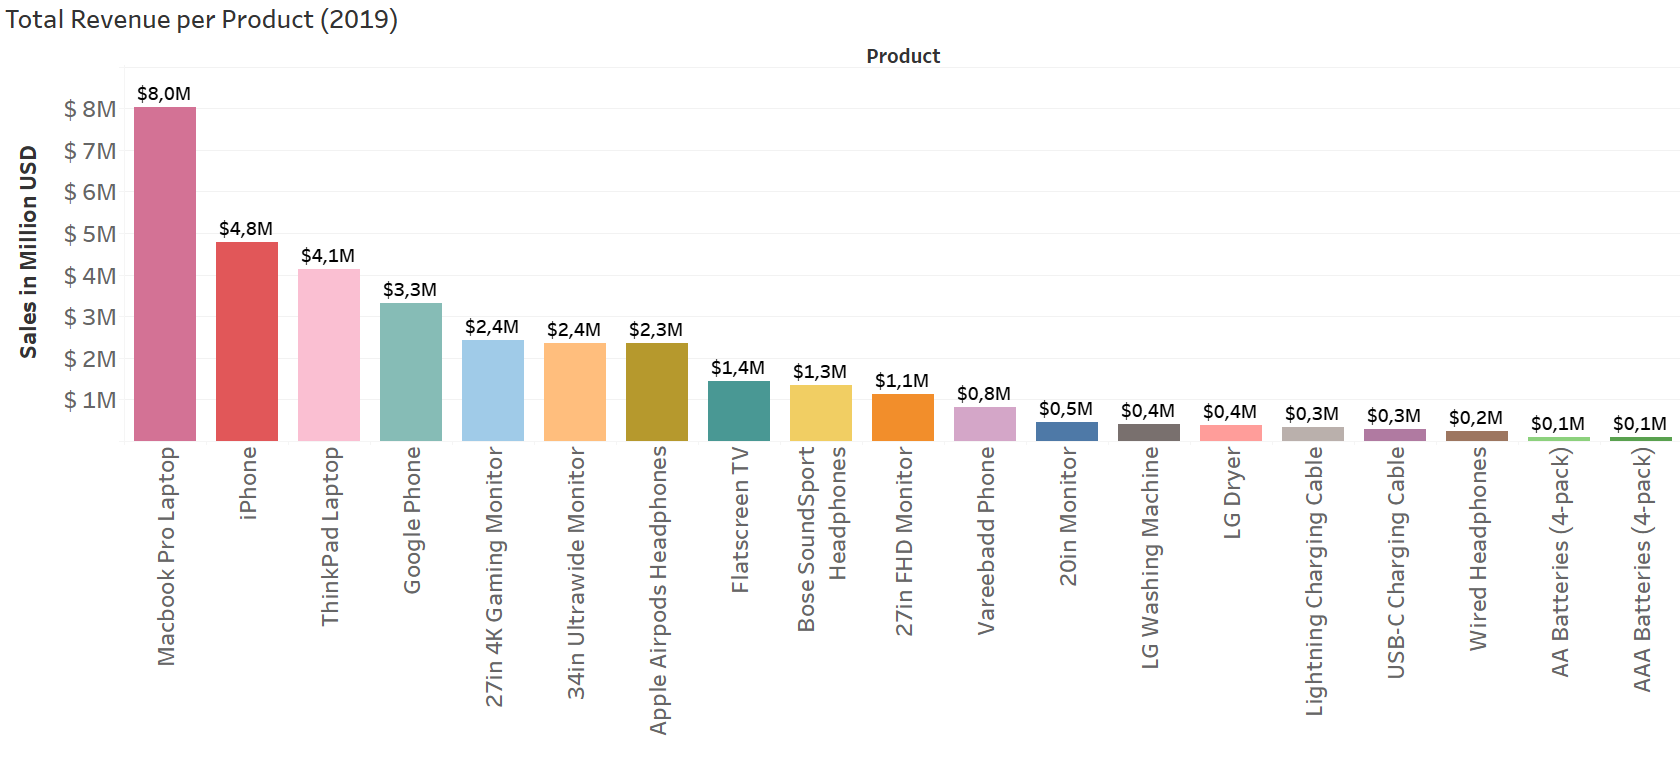

More expensive products generate higher revenues, even considering that they sell fewer units. In the same way, cheaper products do not greatly impact total revenue, even taking into account that they are the firm's best-selling products. In addition, I create a graph that indicates the % of Total Revenue generated by each products' sales in 2019:

### Chart 14)

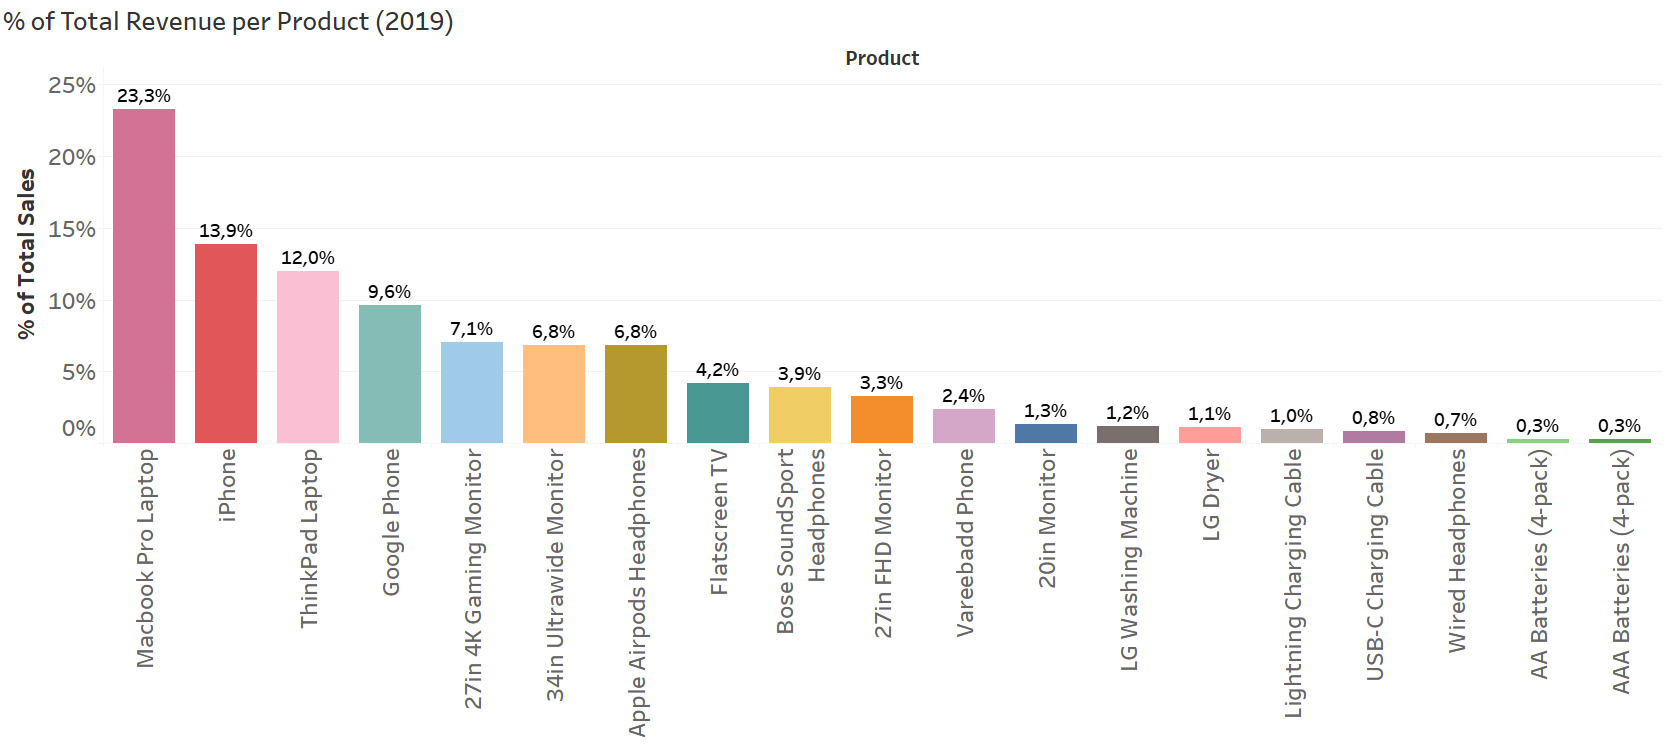

### Answer Q6:

The Macbook Pro Laptop sales represented 23,3% of the firm's revenue in 2019. It is important to state that the three products that generate more revenue are also the most expensive: The Macbook Pro, the ThinkPad Laptop and the Iphone, which represented 49,2% of the company's revenue in 2019.

Suggestion: the company should focus its marketing efforts on the products that generate more revenue to the firm. Offering combos with complementary products should be enough to boost the cheaper products' sales, considering that people automatically need to buy them, in order to use or have a better experience with their 'main products'. In this sense, headphones are excellent products to be offered in combos, especiallly the Apple Airpods Headphones (150.00 USD) and the Bose SoundSport Headphones (99.99 USD), considering that their prices are much higher than batteries' and charging cable's prices, and they also sell a considerable amount of units. This is why they represented between 3,9% (Bose Headphones) and 6,8% (Apple Airpods) of the company's total revenue in 2019.

### Thank you!

If you are interested in my work or if you have any feedback, please don't hesitate in contacting me.